In [151]:
from load_data import load_breast_cancer_data, load_wine_quality_data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data loading and preprocessing

In [86]:
set(y2)
x=pd.read_excel("data/winequality-white.xlsx",engine='openpyxl')
X2=x.iloc[:,0:11]
y2=x['quality']

In [87]:
y2.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [303]:
x=pd.read_excel("../data/archive/winequality-white.xlsx",engine='openpyxl')
x.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code

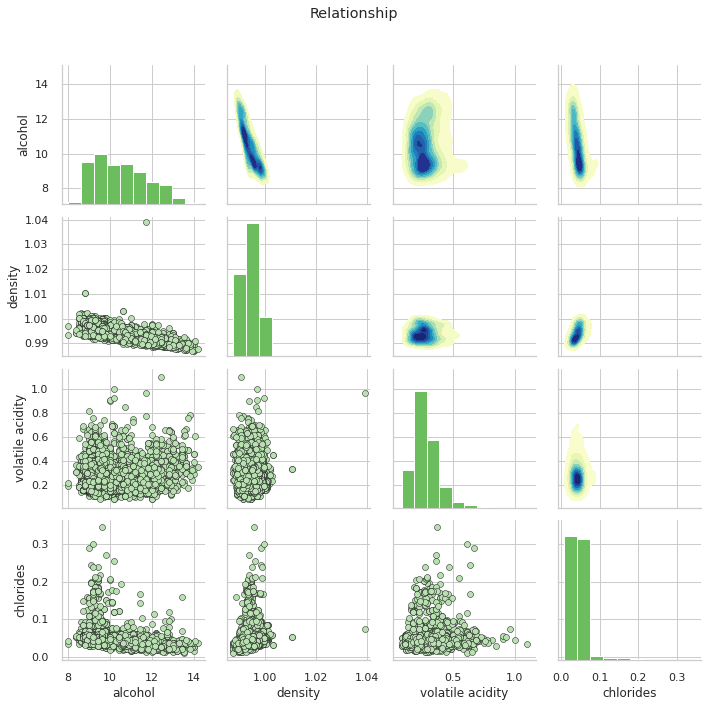

In [308]:
g = sns.PairGrid(x[['alcohol','density','volatile acidity','chlorides']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)

In [304]:
x['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [66]:
X2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [88]:

print ("Total number of examples: ", X2.shape[0])
print ("Fraction of positive examples: %.2f%%" % (y2[y2 == 1].shape[0]/y2.shape[0]*100.0))
print ("Number of features: ", X2.shape[1])
print()

# Random seed for reproducibility of experiments
random_seed = 7641
np.random.seed(random_seed)

# Standardize data

X2 = preprocessing.scale(X2)

<------------------------ Breast Cancer Dataset ------------------------>
Total number of examples:  569
Fraction of positive examples: 37.26%
Number of features:  30

<------------------------ Wine Quality Dataset ------------------------>
Total number of examples:  4898
Fraction of positive examples: 0.00%
Number of features:  11



# Clustering without dimensionality reduction

## k-means

In [215]:
X2.shape

(4898, 11)

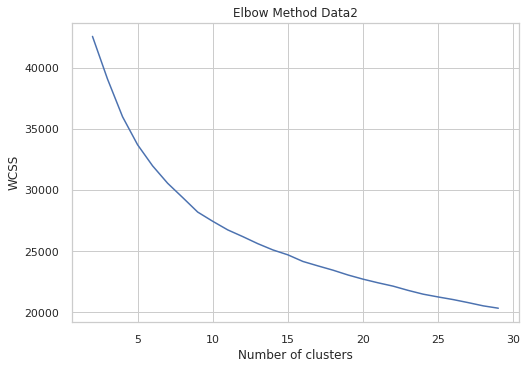

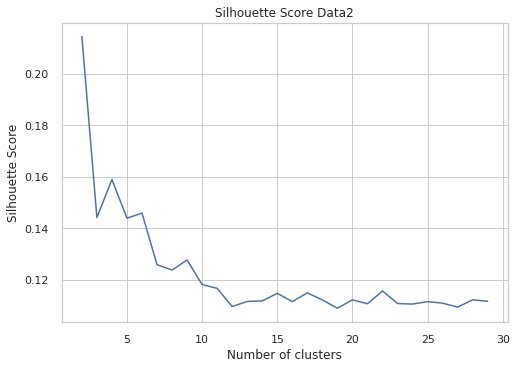

In [212]:
wcss = []
sscore=[]
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
    sscore.append(silhouette_score(X2, kmeans.labels_, metric='euclidean'))
#
# Print the score
#
# print('Silhouetter Score: %.3f' % score)


plt.plot(range(2, 30), wcss)
plt.title('Elbow Method Data2')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('../plots/kmeans2_WCSS.png')
plt.show()

plt.plot(range(2, 30), sscore)
plt.title('Silhouette Score Data2')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('../plots/kmeans2_SScore.png')
plt.show()

In [10]:
# # Find the optimal k
# k_grid = np.arange(2, 31)
# # k_grid = np.arange(2, 31, 2)
# loss1 = np.zeros(k_grid.size)
# loss2 = np.zeros(k_grid.size)
# for idx, k in enumerate(k_grid):
#     print ("k = ", k)
#     kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs=-1)
#     kmeans.fit(X1)
#     loss1[idx] = kmeans.inertia_
#     kmeans.fit(X2)
#     loss2[idx] = kmeans.inertia_

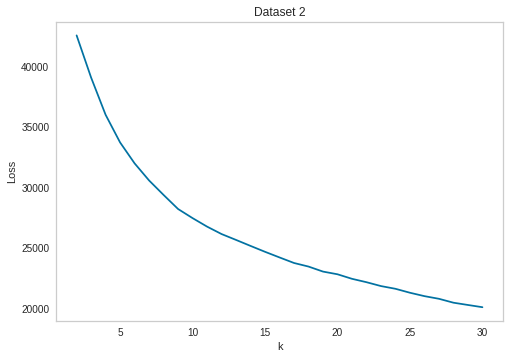

In [90]:
# # Plot loss vs k to find best k
# plt.figure()
# plt.plot(k_grid, loss1)
# # plt.xticks(k_grid)
# plt.xlabel('k')
# plt.ylabel('Loss')
# plt.title('Dataset 1')
# plt.grid()
# plt.savefig('../plots/kmeans_loss_1.png')

plt.figure()
plt.plot(k_grid, loss2)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 2')
plt.grid()
plt.savefig('../plots/kmeans_loss_2.png')

In [5]:
# Choose k according to the approximate elbow location
k1 = 9
k2 = 9

In [6]:
# Run kmeans again with optimal k values
# kmeans1 = KMeans(n_clusters=k1, random_state=random_seed, max_iter=300, n_jobs=-1)
kmeans2 = KMeans(n_clusters=k2, random_state=random_seed, max_iter=300, n_jobs=-1)
# kmeans1.fit(X1)
kmeans2.fit(X2)

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


KMeans(n_clusters=9, n_jobs=-1, random_state=7641)

### Evaluate quality of clusters

In [91]:

print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', kmeans2.inertia_)
score2 = silhouette_score(X2, kmeans2.labels_)
print('Silhouette score: ', score2)
ami2 = adjusted_mutual_info_score(y2, kmeans2.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami2)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  6829.7881663898015
Silhouette score:  0.14099752149567427
Adjusted Mutual Information (AMI) score:  0.3461830269080003

<------------------------ Dataset 2 ------------------------>
Inertia:  28198.16062442552
Silhouette score:  0.12861663122568295
Adjusted Mutual Information (AMI) score:  0.06925843953312412



### Visualization of clusters

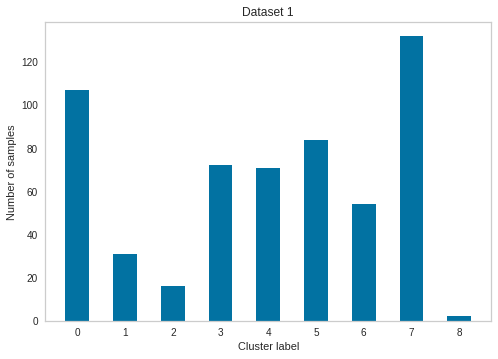

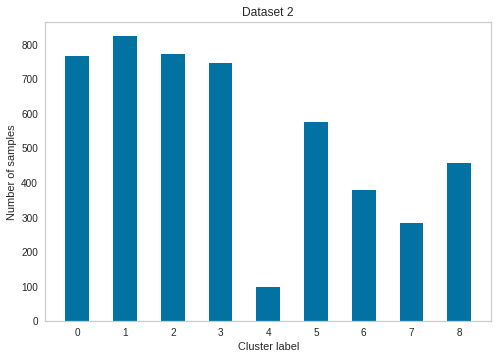

In [92]:
# Dataset 1
plt.figure()
plt.hist(kmeans1.labels_, bins=np.arange(0, k1 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k1))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1')
plt.grid()
plt.savefig('../plots/kmeans_hist_1.png')

# Dataset 2
plt.figure()
plt.hist(kmeans2.labels_, bins=np.arange(0, k2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2')
plt.grid()
plt.savefig('../plots/kmeans_hist_2.png')

In [93]:
set(y2)

{3, 4, 5, 6, 7, 8, 9}

In [99]:
x.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

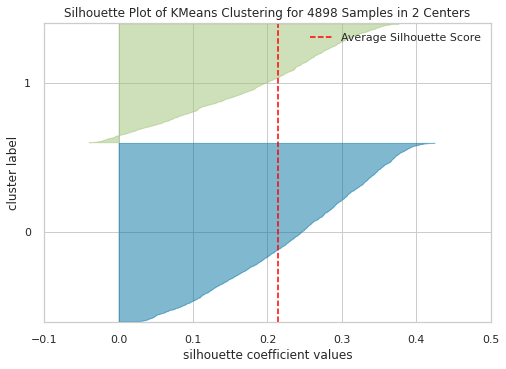

In [244]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick' )
    
visualizer.fit(X2)
visualizer.finalize()

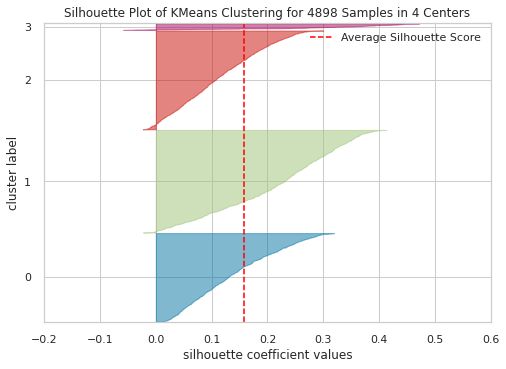

In [245]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick' )
    
visualizer.fit(X2)
visualizer.finalize()

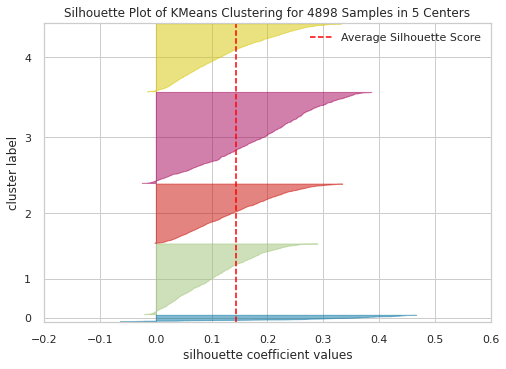

In [246]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick' )
    
visualizer.fit(X2)
visualizer.finalize()

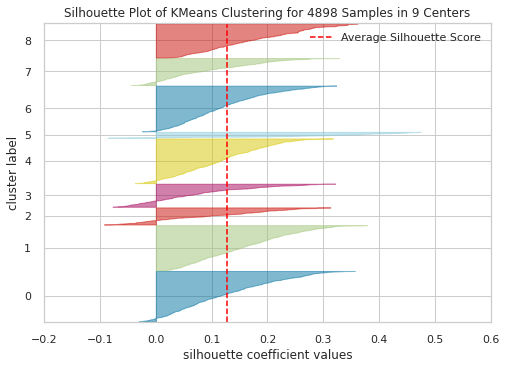

In [247]:
km = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick' )
    
visualizer.fit(X2)
visualizer.finalize()

0 0 2


AttributeError: 'int' object has no attribute 'fill_betweenx'

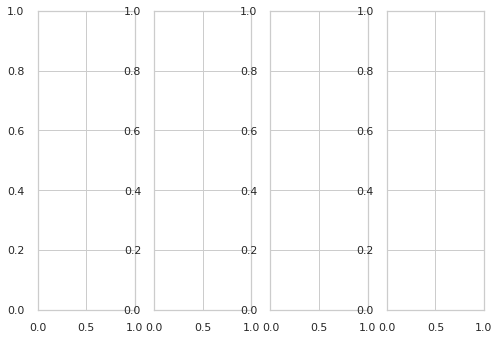

In [243]:
### from yellowbrick.cluster import SilhouetteVisualizer

# fig, ax = plt.subplots(1, 4, figsize=(15,8),squeeze=False)
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4)
for i in [2,4,5,9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    if i==2:
        q, mod = divmod(i-2, 2)
        print(q,mod,i)
    if i==5:
        q, mod = divmod(i-4, 2)
        print(q-1,mod,i)
    if i==9:
        q, mod = divmod(i-7, 2)
        print(q-1,mod,i)
    if i==4:
        q, mod = divmod(i-1, 2)
        print(q-1,mod,i)
    j="ax"+str(i)    
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
                                      ax=[-1][-1])
    
    visualizer.fit(X2)
    visualizer.finalize()

In [104]:
# fig, ax = plt.subplots(2, 2, figsize=(15,8))
# for i in [4]:
#     '''
#     Create KMeans instance for different number of clusters
#     '''
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(i-1, 2)
#     '''
#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
#     '''
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(X2)

In [112]:
X2.shape

(4898, 11)

In [111]:
df=pd.DataFrame(columns=x.columns)
print(df.shape)
df=df.drop(['quality'],axis=1)
print(df.shape)
df=pd.DataFrame(X2)
df.columns=x.columns


(0, 12)
(0, 11)


ValueError: Length mismatch: Expected axis has 11 elements, new values have 12 elements

(4898, 13)


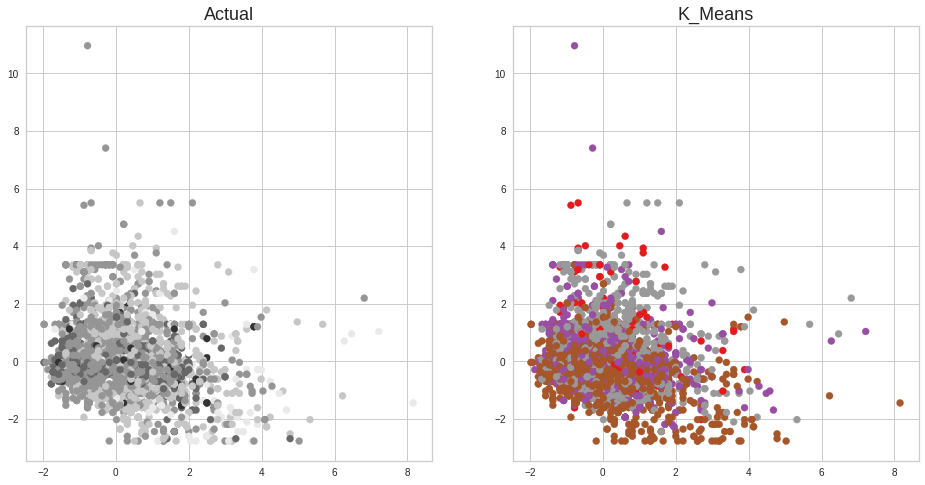

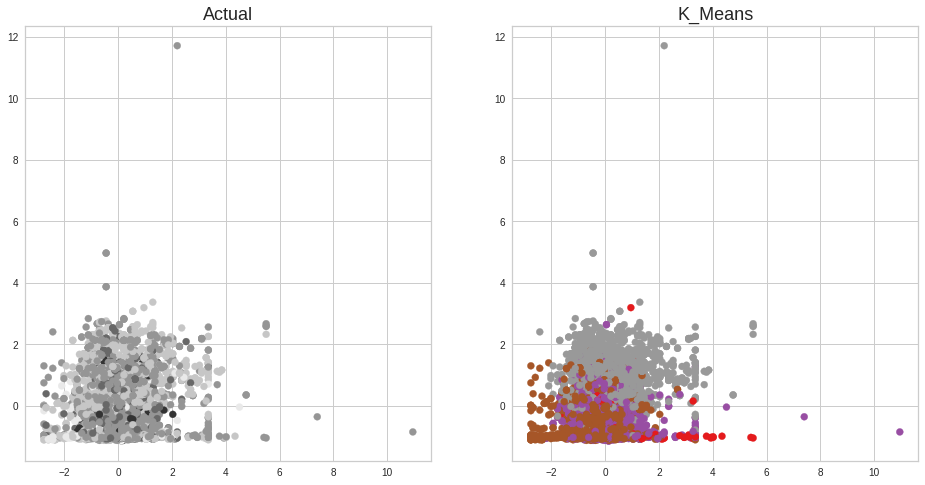

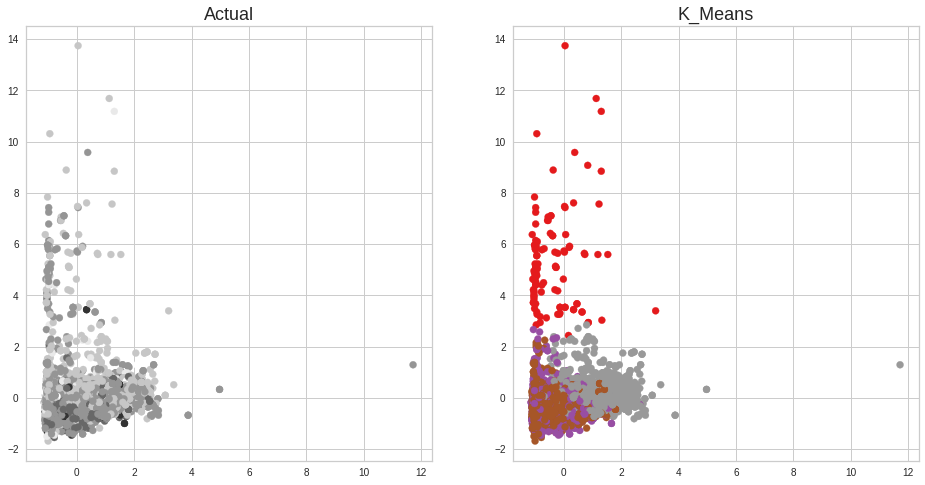

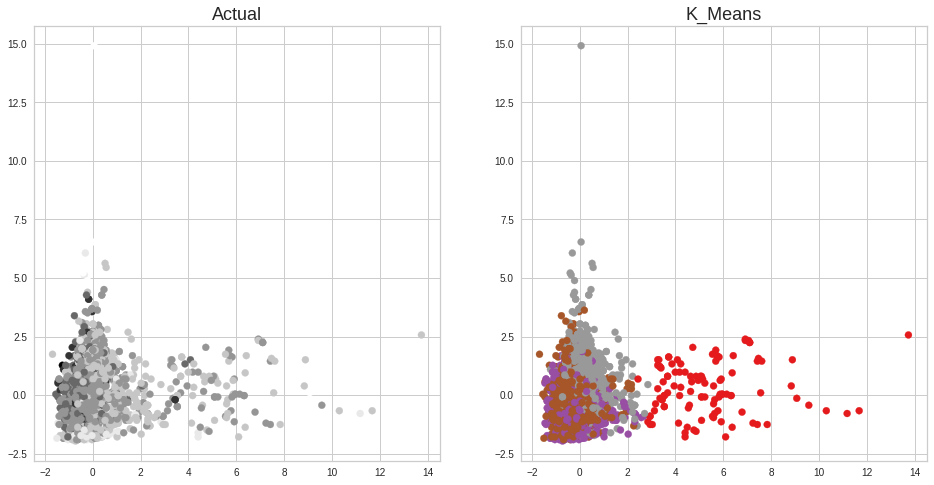

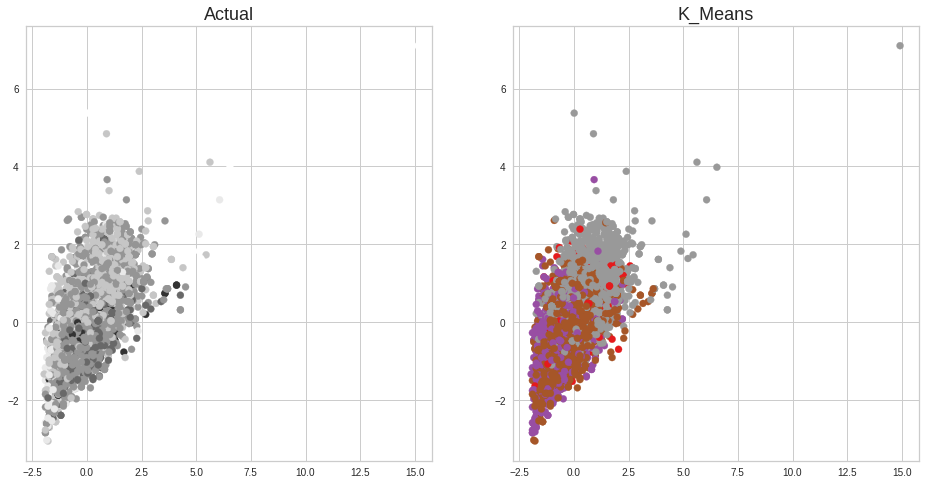

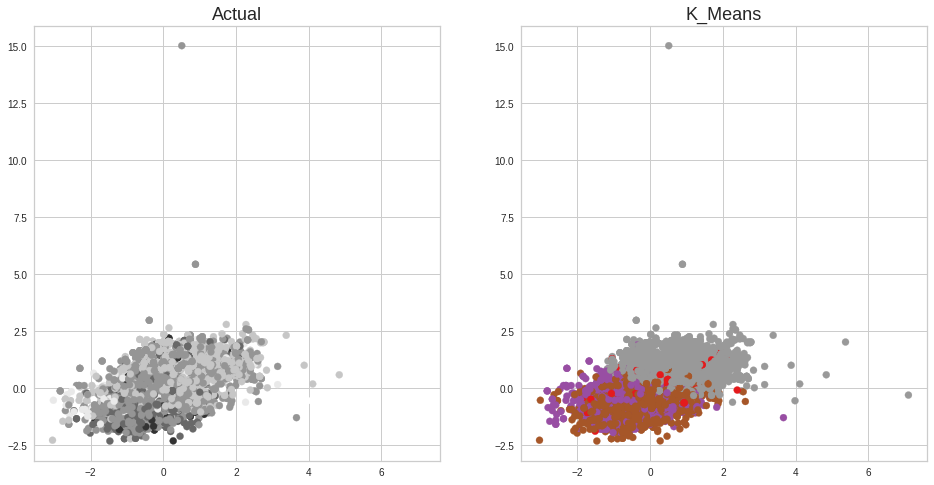

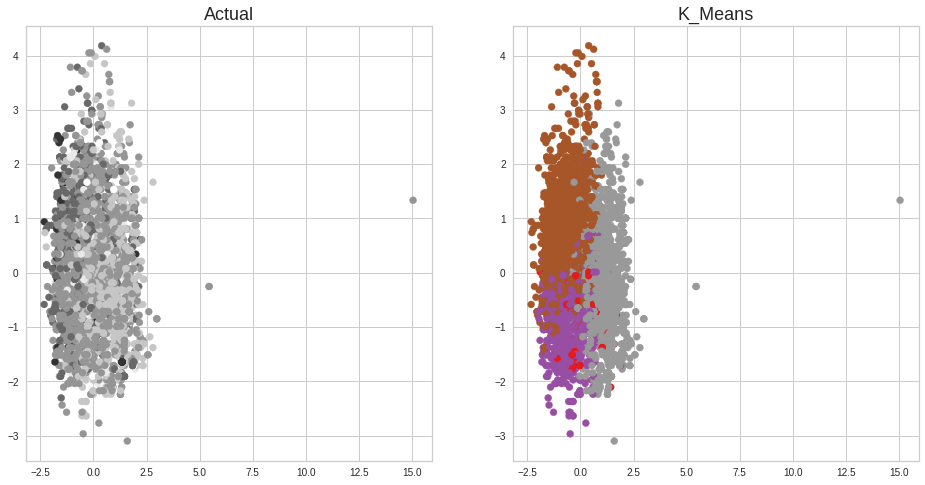

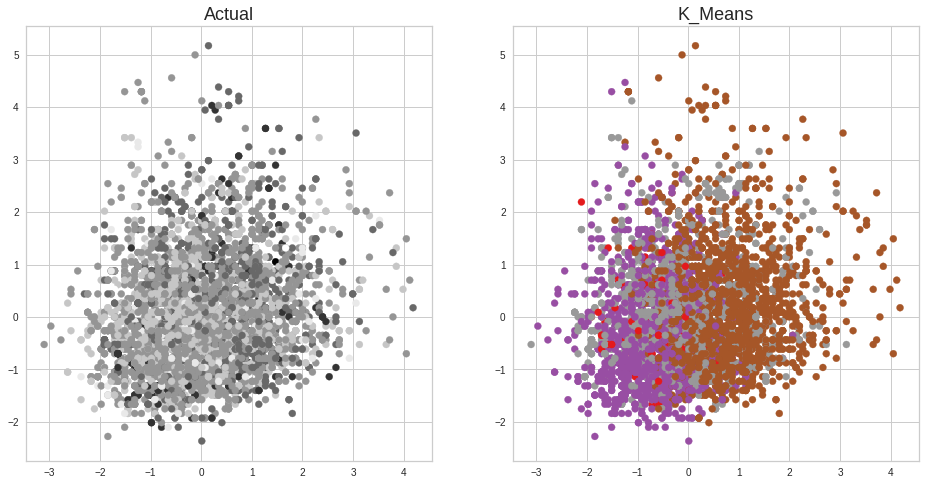

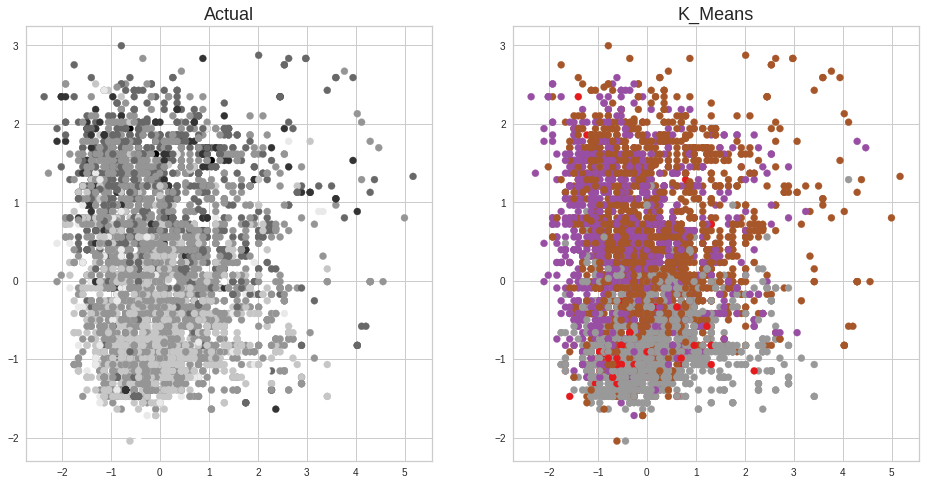

In [116]:
kmeanModel= KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel.fit(X2)

# X2[:,5].shape
kmeanModel.predict(X2)
# y_train_res.shape

df=pd.DataFrame(columns=x.columns)
df.shape
df=df.drop(['quality'],axis=1)
df=pd.DataFrame(X2)
# df.columns=x.columns



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=X2[:,5]
# df['6']=X2[:,6]
df['k_means']=kmeanModel.predict(X2)
df['target']=y2
print(df.shape)

for i in range(1,10):
#     print(i)
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['target'])
    axes[1].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['k_means'], cmap=plt.cm.Set1)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)

In [119]:
import seaborn as sns

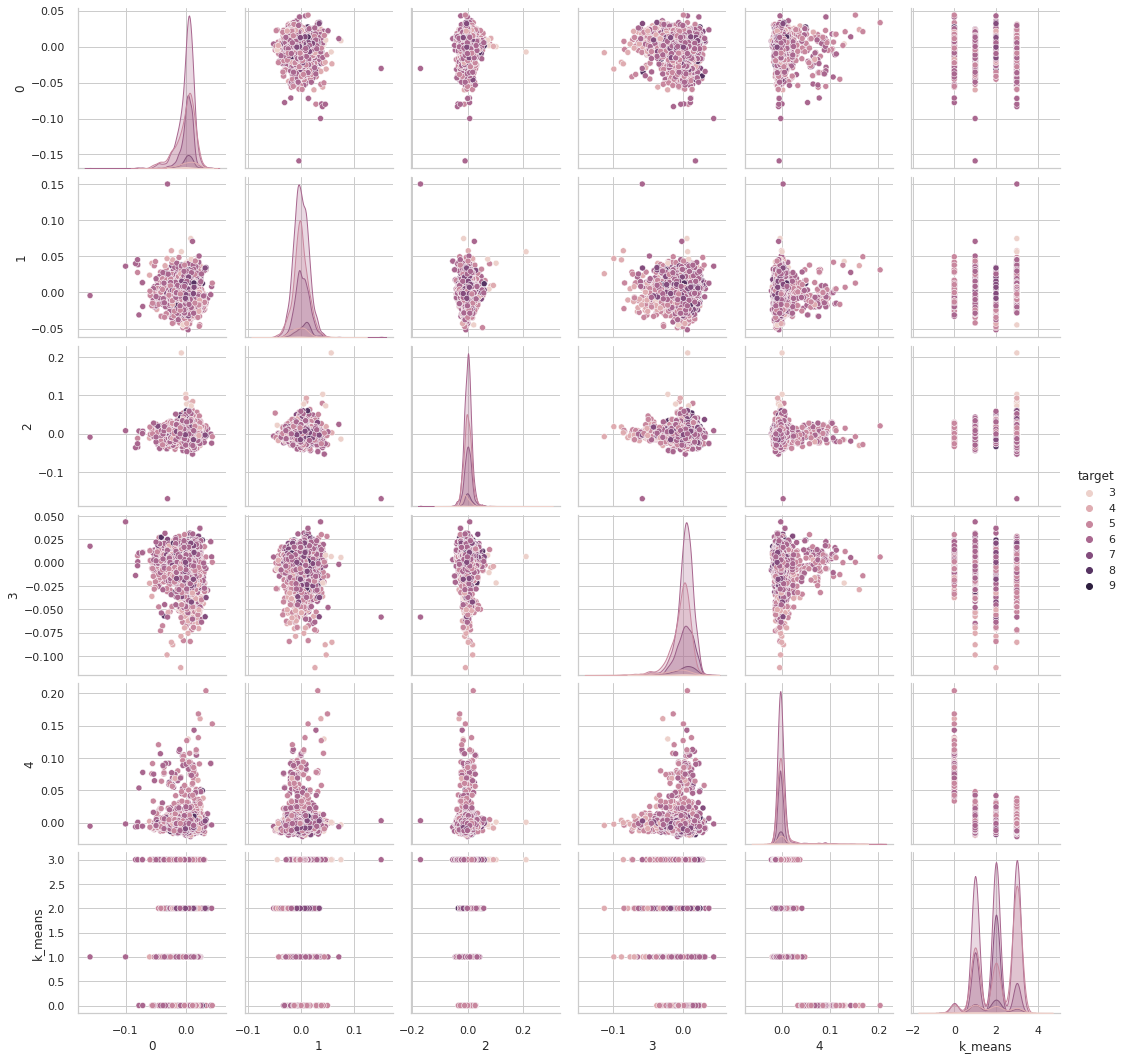

In [248]:
sns.pairplot(df, hue="target")


(4898, 7)


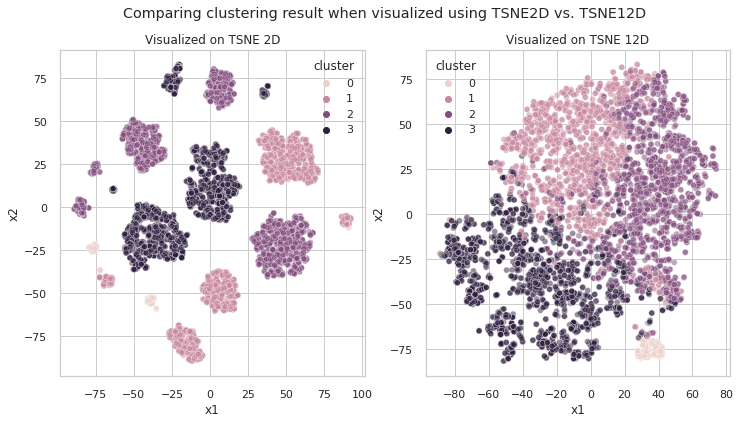

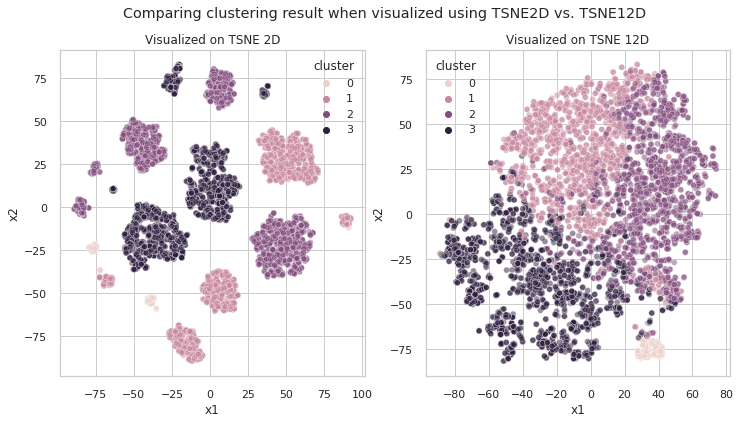

In [213]:
from sklearn.manifold import TSNE



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=X2[:,5]
# df['6']=X2[:,6]
df['k_means']=kmeanModel.predict(X2)
df['target']=y2
print(df.shape)

Xtsne = TSNE(n_components=2).fit_transform(X2)
dftsneFull = pd.DataFrame(Xtsne)

dftsneFull['cluster'] = df['k_means']
dftsneFull.columns = ['x1','x2','cluster']



Xtsne = TSNE(n_components=2).fit_transform(df)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = df['k_means']
dftsne.columns = ['x1','x2','cluster']

fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dftsneFull,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on TSNE 12D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. TSNE12D')
display(fig)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...    perimeter_worst  area_worst  \
0                2.255747  

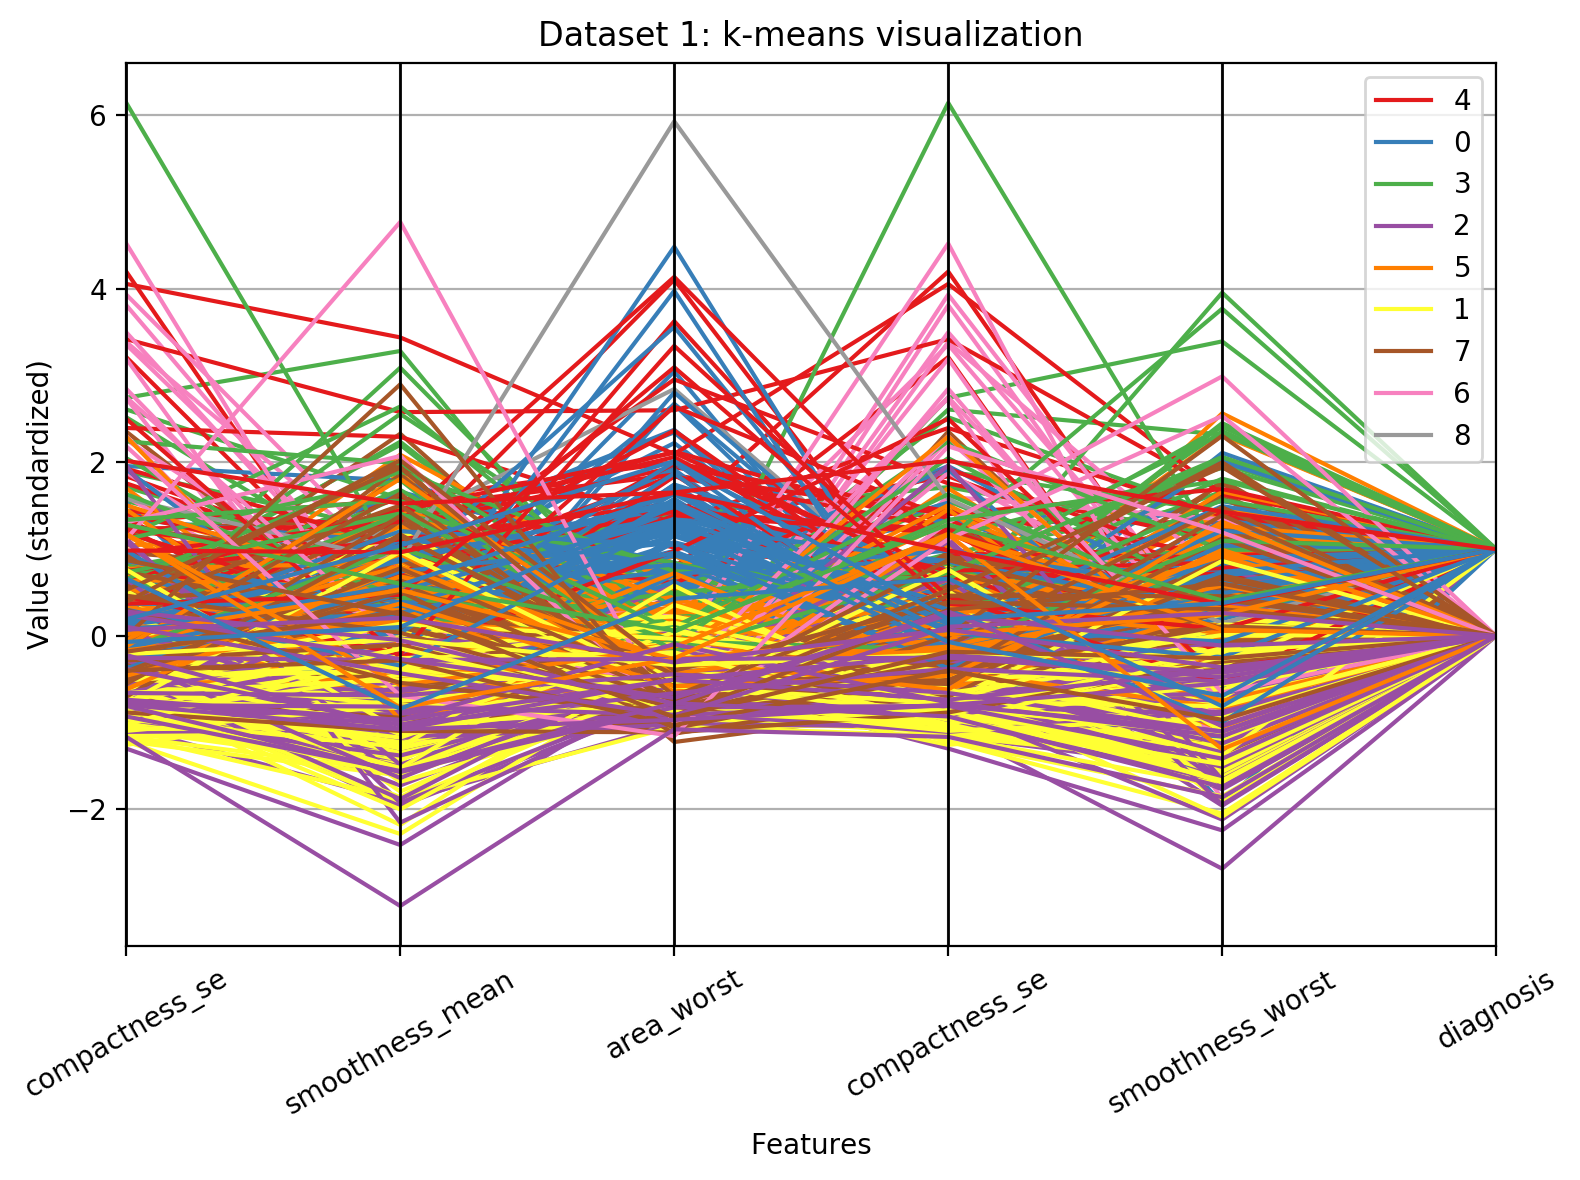

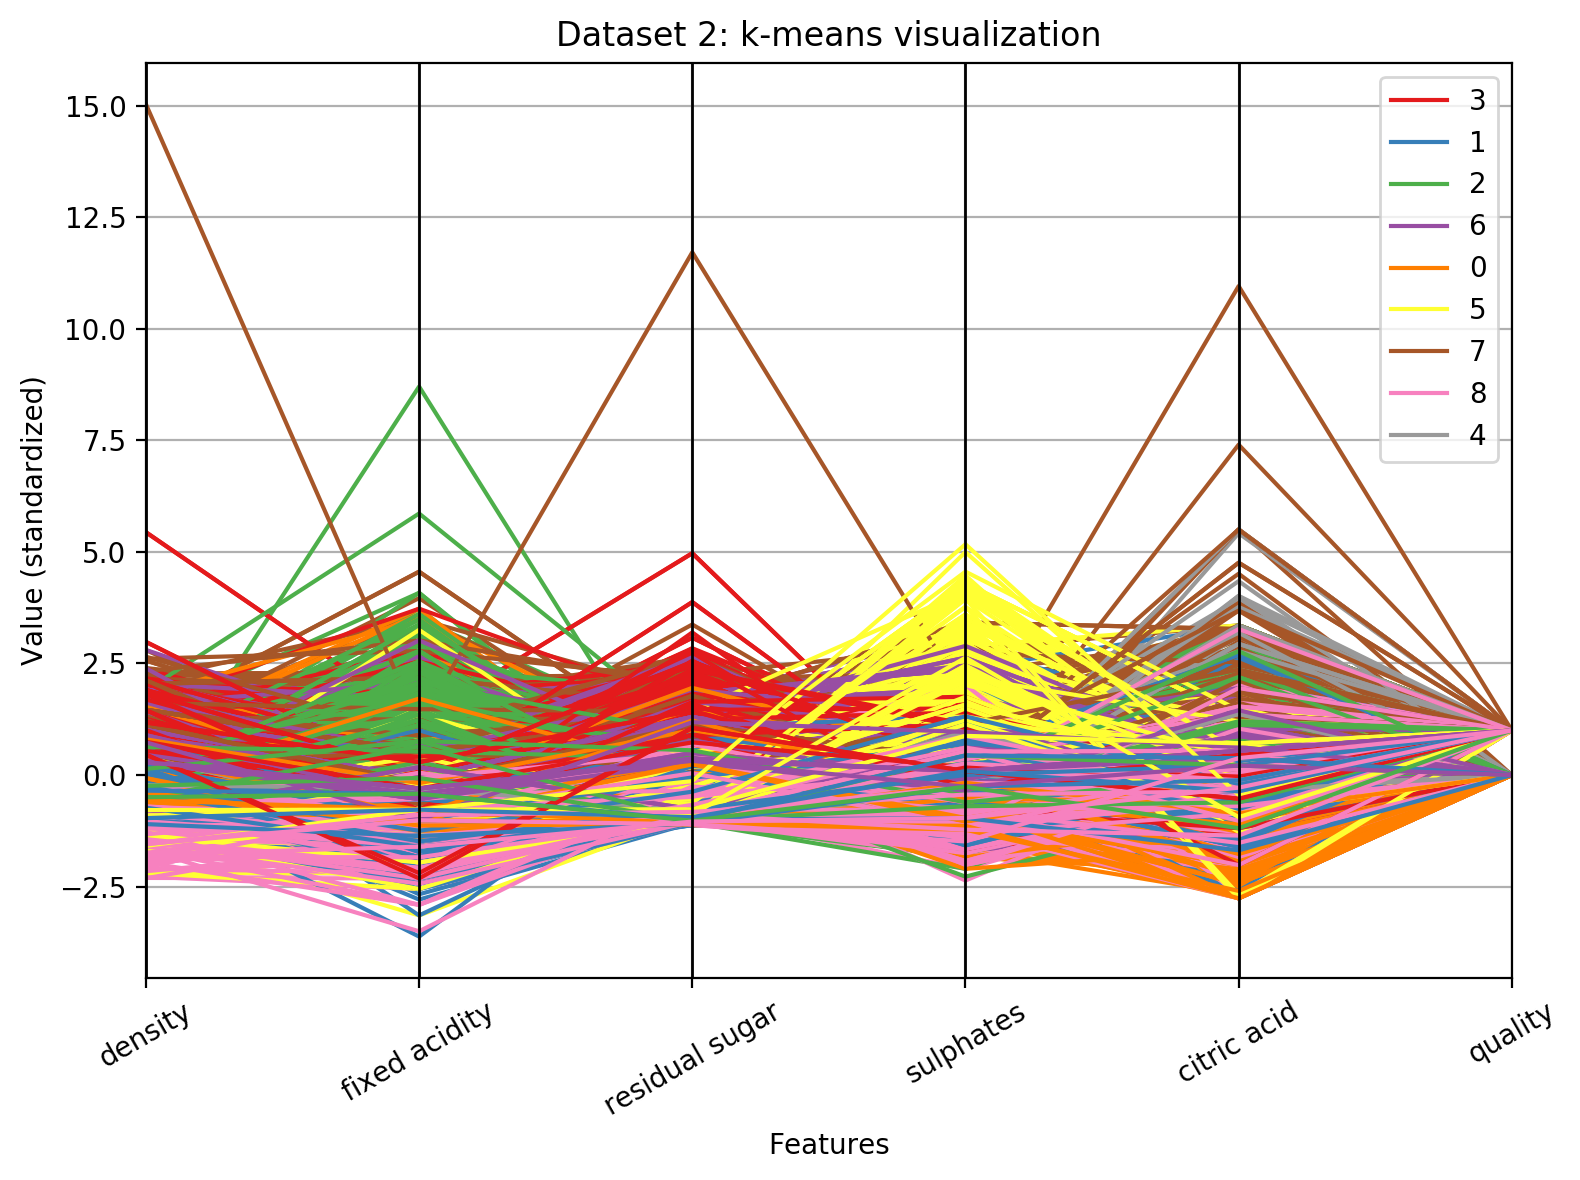

In [39]:
# Dataset 1
df1 = pd.read_csv('../data/breast-cancer-wisconsin-data/data.csv', nrows=1)
to_drop = ['Unnamed: 32', 'id', 'diagnosis']
df1 = df1.drop(to_drop, axis=1)
cols1 = df1.columns
df1 = pd.DataFrame(X1, columns = cols1)
df1['diagnosis'] = y1
df1['class'] = kmeans1.labels_
print(df1.head(5))

# Parallel coordinates plot
rand_idx1 = np.random.randint(0, df1.shape[1] - 2, 5)   # randomly pick 5 features for visualization
idx_viz1 = np.append(rand_idx1, [df1.shape[1] - 2, df1.shape[1] - 1])    # Add ground truth label and cluster label

# plt.figure(figsize=(10, 7.5), dpi=250)
plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df1.iloc[:, idx_viz1], 'class', colormap='Set1')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value (standardized)')
plt.title('Dataset 1: k-means visualization')
plt.tight_layout()
plt.savefig('../plots/kmeans_viz_1.png')

# Dataset 2
df2 = pd.read_csv('../data/wine-quality/winequality-white.csv', sep=';', nrows=1)
to_drop = ["quality"]
df2 = df2.drop(to_drop, axis=1)
cols2 = df2.columns
df2 = pd.DataFrame(X2, columns = cols2)
df2['quality'] = y2
df2['class'] = kmeans2.labels_
print(df2.head(5))

# Parallel coordinates plot
rand_idx2 = np.random.randint(0, df2.shape[1] - 2, 5)   # randomly pick 5 features for visualization
idx_viz2 = np.append(rand_idx2, [df2.shape[1] - 2, df2.shape[1] - 1])    # Add ground truth label and cluster label

# plt.figure(figsize=(10, 7.5), dpi=250)
plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df2.iloc[:, idx_viz2], 'class', colormap='Set1')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value (standardized)')
plt.title('Dataset 2: k-means visualization')
plt.tight_layout()
plt.savefig('../plots/kmeans_viz_2.png')

## GMM

In [121]:
# Find the optimal number of components using BIC
n_components_grid1 = np.arange(2, 31)
n_components_grid2 = np.arange(2, 51)
bic1 = np.zeros(n_components_grid1.size)
bic2 = np.zeros(n_components_grid2.size)

# print ("<------------------------ Dataset 1 ------------------------>")
# for idx, n_components in enumerate(n_components_grid1):
#     print ("Number of components = ", n_components)
#     gmm1 = GaussianMixture(n_components=n_components, random_state=random_seed)
#     gmm1.fit(X1)
#     bic1[idx] = gmm1.bic(X1)
# print()
print ("<------------------------ Dataset 2 ------------------------>")
for idx, n_components in enumerate(n_components_grid2):
    print ("Number of components = ", n_components)
    gmm2 = GaussianMixture(n_components=n_components, random_state=random_seed)
    gmm2.fit(X2)
    bic2[idx] = gmm2.bic(X2)

<------------------------ Dataset 2 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =  5
Number of components =  6
Number of components =  7
Number of components =  8
Number of components =  9
Number of components =  10
Number of components =  11
Number of components =  12
Number of components =  13
Number of components =  14
Number of components =  15
Number of components =  16
Number of components =  17
Number of components =  18
Number of components =  19
Number of components =  20
Number of components =  21
Number of components =  22
Number of components =  23
Number of components =  24
Number of components =  25
Number of components =  26
Number of components =  27
Number of components =  28
Number of components =  29
Number of components =  30
Number of components =  31
Number of components =  32
Number of components =  33
Number of components =  34
Number of components =  35
Number of components =  36
N

Automatically created module for IPython interactive environment


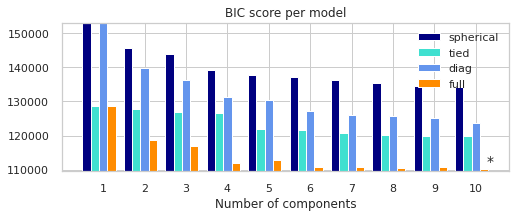

In [254]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 200

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X=X2
lowest_bic = np.infty
bic = []
n_components_range = range(1, 11)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
# 

In [252]:
best_gmm

GaussianMixture(n_components=10)

In [ ]:


gmm = mixture.GaussianMixture(n_components=6,
                                      covariance_type='diag')
gmmData=gmm.fit(X)



gmmDataDf=gmmData.predict_proba(X)

gmmDataDf=pd.DataFrame(gmmDataDf)

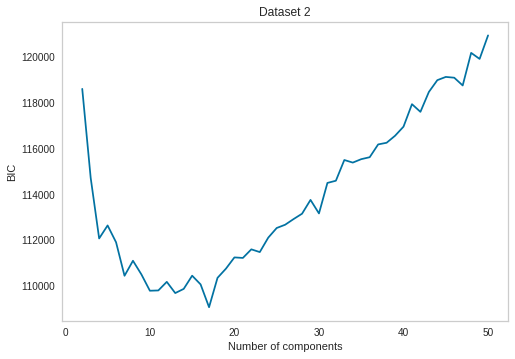

In [122]:
# # Plot BIC vs number of components
# plt.figure()
# plt.plot(n_components_grid1, bic1)
# # plt.xticks(k_grid)
# plt.xlabel('Number of components')
# plt.ylabel('BIC')
# plt.title('Dataset 1')
# plt.grid()
# plt.savefig('../plots/gmm_bic_1.png')

plt.figure()
plt.plot(n_components_grid2, bic2)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 2')
plt.grid()
plt.savefig('../plots/gmm_bic_2.png')

In [123]:
# n_best_1 = n_components_grid1[np.argmin(bic1)]
# print('Optimal number of components for dataset 1: ', n_best_1)
n_best_2 = n_components_grid2[np.argmin(bic2)]
print('Optimal number of components for dataset 2: ', n_best_2)

Optimal number of components for dataset 2:  17


In [124]:
# Run GMM-EM again with the optimal number of components
# gmm1 = GaussianMixture(n_components=n_best_1, random_state=random_seed, max_iter=1000)
gmm2 = GaussianMixture(n_components=n_best_2, random_state=random_seed, max_iter=1000)
# gmm1.fit(X1)
# gmm_labels1 = gmm1.predict(X1)
gmm2.fit(X2)
gmm_labels2 = gmm2.predict(X2)

Automatically created module for IPython interactive environment
[153001.0995708798] 1 spherical ####
[153001.0995708798, 145698.5952243247] 2 spherical ####
[153001.0995708798, 145698.5952243247, 144011.93859363877] 3 spherical ####
[153001.0995708798, 145698.5952243247, 144011.93859363877, 139217.1610200668] 4 spherical ####
[153001.0995708798, 145698.5952243247, 144011.93859363877, 139217.1610200668, 137682.06774579015] 5 spherical ####
[153001.0995708798, 145698.5952243247, 144011.93859363877, 139217.1610200668, 137682.06774579015, 137042.86266640795] 6 spherical ####
[153001.0995708798, 145698.5952243247, 144011.93859363877, 139217.1610200668, 137682.06774579015, 137042.86266640795, 136121.17563018735] 7 spherical ####
[153001.0995708798, 145698.5952243247, 144011.93859363877, 139217.1610200668, 137682.06774579015, 137042.86266640795, 136121.17563018735, 135282.62971330466] 8 spherical ####
[153001.0995708798, 145698.5952243247, 144011.93859363877, 139217.1610200668, 137682.067745

[153001.0995708798, 145698.5952243247, 144011.93859363877, 139217.1610200668, 137682.06774579015, 137042.86266640795, 136121.17563018735, 135282.62971330466, 134510.439861423, 128672.86320805602, 127745.17181079555, 126903.52426998893, 122616.25375618575, 121800.272776749, 121075.38406128979, 120384.07112483802, 120277.97517136141, 119832.7345567105, 153086.06539325492, 139773.46117578878, 136223.87351055435, 131346.909526836, 130865.68273609129, 127668.93889857331, 126151.88027936457, 125689.3661275469, 124850.77617175956, 128672.86320805602, 118604.15169777395, 114713.48547529653] 3 full ####
[153001.0995708798, 145698.5952243247, 144011.93859363877, 139217.1610200668, 137682.06774579015, 137042.86266640795, 136121.17563018735, 135282.62971330466, 134510.439861423, 128672.86320805602, 127745.17181079555, 126903.52426998893, 122616.25375618575, 121800.272776749, 121075.38406128979, 120384.07112483802, 120277.97517136141, 119832.7345567105, 153086.06539325492, 139773.46117578878, 13622

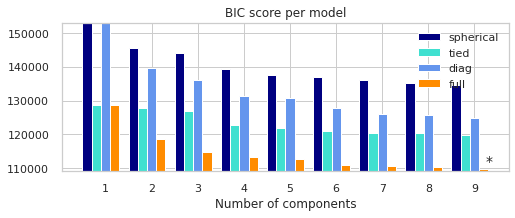

In [198]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
# C = np.array([[0., -0.1], [1.7, .4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X=X2
lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        print(bic,n_components,cv_type,"####")
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


In [197]:
best_gmm

GaussianMixture(n_components=9)

In [199]:


gmm = mixture.GaussianMixture(n_components=9,
                                      covariance_type='full')
gmmData=gmm.fit(X)



gmmDataDf=gmmData.predict_proba(X)

gmmDataDf=pd.DataFrame(gmmDataDf)

In [317]:
X.shape

(4898, 5)

In [318]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 8

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 3], X[:, 4], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

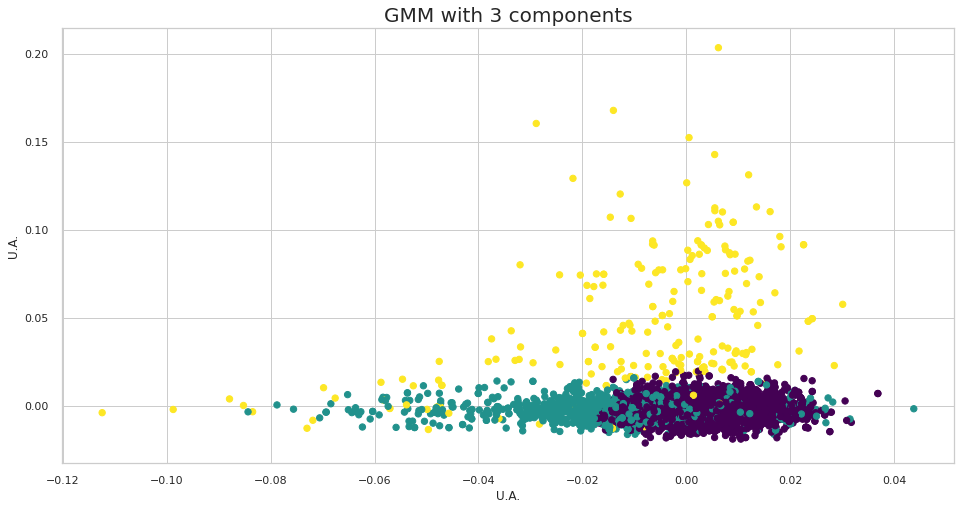

In [319]:
plot_gmm(gmm, X)


Feature: 0, Score: 0.07789
Feature: 1, Score: 0.09179
Feature: 2, Score: 0.06802
Feature: 3, Score: 0.06899
Feature: 4, Score: 0.09036
Feature: 5, Score: 0.10351
Feature: 6, Score: 0.09397
Feature: 7, Score: 0.09040
Feature: 8, Score: 0.09732
Feature: 9, Score: 0.06873
Feature: 10, Score: 0.14902


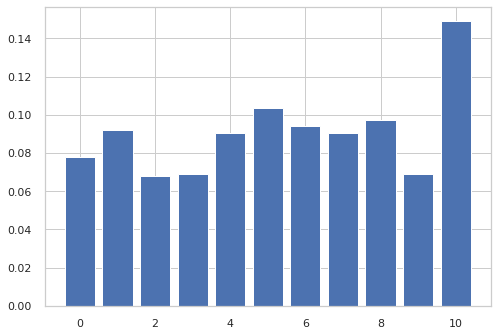

In [202]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(scaled_x_train,y_train_res)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

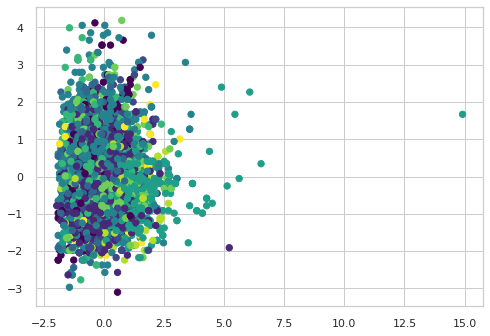

In [255]:
labels = clf.predict(X)
plt.scatter(X[:, 5], X[:, 8], c=labels, s=40, cmap='viridis')

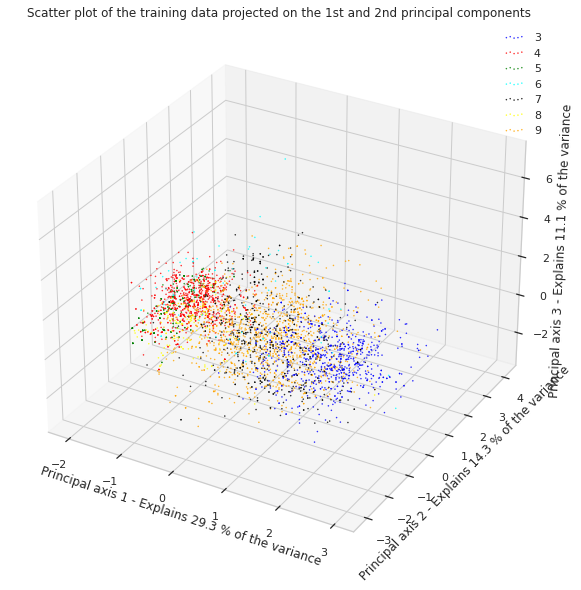

In [205]:
colors = ['blue', 'red','green','cyan','black','yellow','orange','maroon','pink']
fig=plt.figure(1, figsize=(10, 10))
ax = plt.axes(projection ="3d")
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4,5,6,7,8], target_names):
    ax.scatter3D(scaled_x_train[labels == i, 10], scaled_x_train[labels == i, 8],scaled_x_train[labels == i, 6], color=color, s=1,
                alpha=.9, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=5)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
ax.set_xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[0] * 100.0))
ax.set_ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[1] * 100.0))
ax.set_zlabel("Principal axis 3 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[2] * 100.0))

# plt.savefig('pca-porto-01.png', dpi=150)
plt.show()
# plt.savefig('../plots/pca_data2_Com12.png')

### Evaluate quality of clusters

In [210]:
# print ("<------------------------ Dataset 1 ------------------------>")
# print('BIC: ', gmm1.bic(X1))
# score1_gmm = silhouette_score(X1, gmm_labels1)
# print('Silhouette score: ', score1_gmm)
# ami1_gmm = adjusted_mutual_info_score(y1, gmm_labels1)
# print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
# print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', best_gmm.bic(X2))
score2_gmm = silhouette_score(X2, labels)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y2, labels)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 2 ------------------------>
BIC:  109640.37439440111
Silhouette score:  0.027729548946207622
Adjusted Mutual Information (AMI) score:  0.07545305623735317



### Visualization of clusters

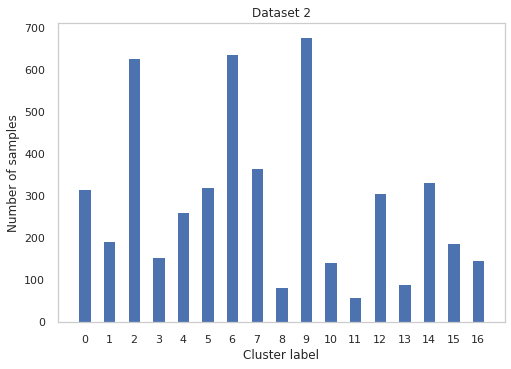

In [214]:
# Dataset 1
# plt.figure()
# plt.hist(gmm_labels1, bins=np.arange(0, n_best_1 + 1) - 0.5, rwidth=0.5, zorder=2)
# plt.xticks(np.arange(0, n_best_1))
# plt.xlabel('Cluster label')
# plt.ylabel('Number of samples')
# plt.title('Dataset 1')
# plt.grid()
# plt.savefig('../plots/gmm_hist_1.png')

# Dataset 2
plt.figure()
plt.hist(gmm_labels2, bins=np.arange(0, n_best_2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_best_2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2')
plt.grid()
plt.savefig('../plots/gmm_hist_2.png')

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...    perimeter_worst  area_worst  \
0                2.255747  

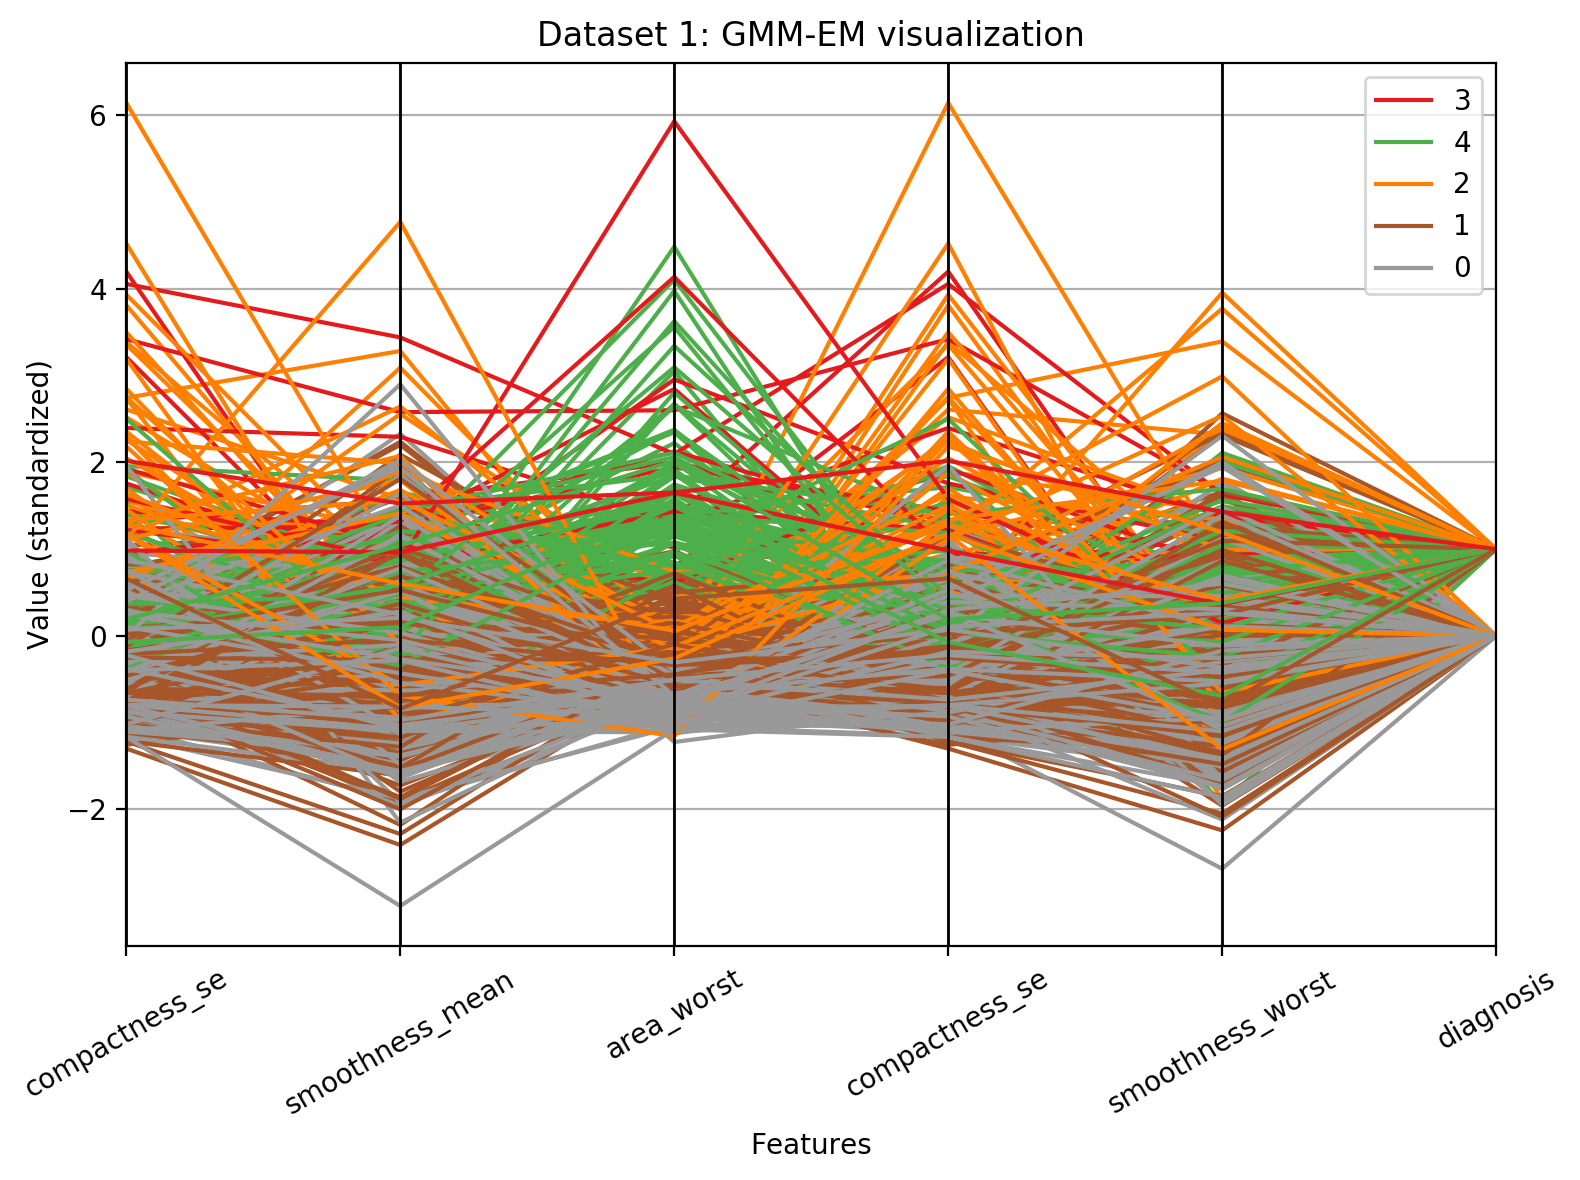

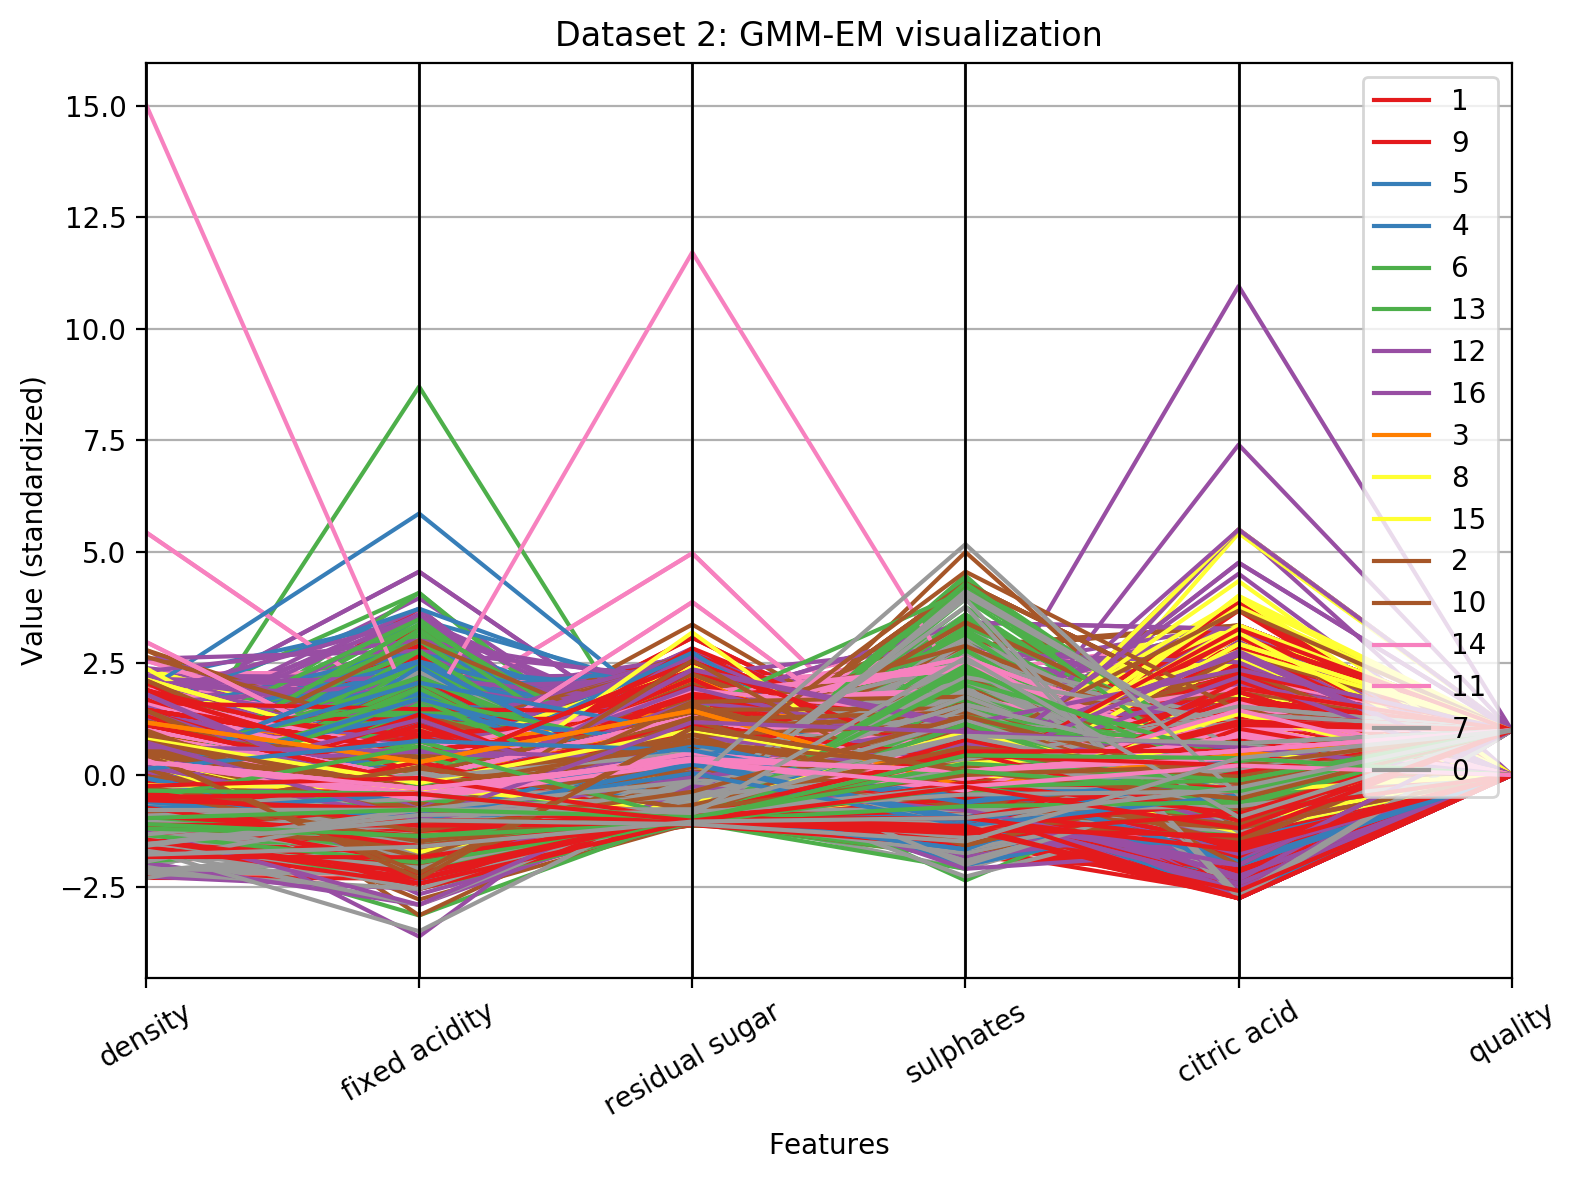

In [64]:
# Dataset 1
df1_gmm = pd.read_csv('../data/breast-cancer-wisconsin-data/data.csv', nrows=1)
to_drop = ['Unnamed: 32', 'id', 'diagnosis']
df1_gmm = df1_gmm.drop(to_drop, axis=1)
cols1 = df1_gmm.columns
df1_gmm = pd.DataFrame(X1, columns = cols1)
df1_gmm['diagnosis'] = y1
df1_gmm['class'] = gmm_labels1
print(df1_gmm.head(5))

# Parallel coordinates plot
idx_viz1_gmm = idx_viz1    # pick the same 5 features used in kmeans for visualization

# plt.figure(figsize=(10, 7.5), dpi=250)
plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df1_gmm.iloc[:, idx_viz1_gmm], 'class', colormap='Set1')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value (standardized)')
plt.title('Dataset 1: GMM-EM visualization')
plt.tight_layout()
plt.savefig('../plots/gmm_viz_1.png')

# Dataset 2
df2_gmm = pd.read_csv('../data/wine-quality/winequality-white.csv', sep=';', nrows=1)
to_drop = ["quality"]
df2_gmm = df2_gmm.drop(to_drop, axis=1)
cols2 = df2_gmm.columns
df2_gmm = pd.DataFrame(X2, columns = cols2)
df2_gmm['quality'] = y2
df2_gmm['class'] = gmm_labels2
print(df2_gmm.head(5))

# Parallel coordinates plot
idx_viz2_gmm = idx_viz2    # pick the same 5 features used in kmeans for visualization

# plt.figure(figsize=(10, 7.5), dpi=250)
plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df2_gmm.iloc[:, idx_viz2_gmm], 'class', colormap='Set1')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value (standardized)')
plt.title('Dataset 2: GMM-EM visualization')
plt.tight_layout()
plt.savefig('../plots/gmm_viz_2.png')

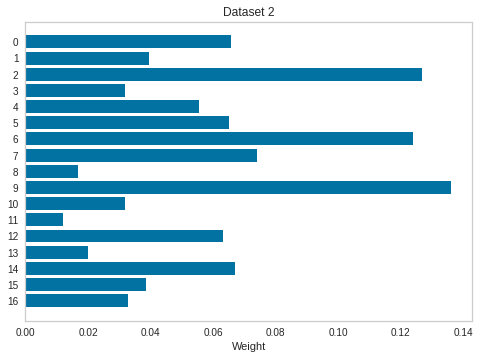

In [127]:
# plt.figure()
# plt.barh(np.arange(n_best_1), gmm1.weights_, zorder=2)
# plt.gca().invert_yaxis()  # labels read top-to-bottom
# plt.title('Dataset 1')
# plt.xlabel('Weight')
# plt.grid()
# plt.savefig('../plots/gmm_wts_1.png')

plt.figure()
plt.barh(np.arange(n_best_2), gmm2.weights_, zorder=2)
plt.gca().set_yticks(np.arange(n_best_2))
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 2')
plt.xlabel('Weight')
plt.grid()
plt.savefig('../plots/gmm_wts_2.png')

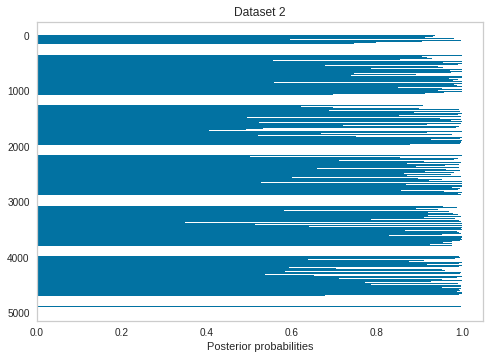

In [128]:
# probs1 = np.amax(gmm1.predict_proba(X1), axis=1)
# plt.figure()
# plt.barh(np.arange(X1.shape[0]), probs1, zorder=2)
# plt.gca().invert_yaxis()  # labels read top-to-bottom
# plt.title('Dataset 1')
# plt.xlabel('Posterior probabilities')
# plt.grid()
# plt.savefig('../plots/gmm_probs_1.png')

probs2 = np.amax(gmm2.predict_proba(X2), axis=1)
plt.figure()
plt.barh(np.arange(X2.shape[0]), probs2, zorder=2)
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 2')
plt.xlabel('Posterior probabilities')
plt.grid()
plt.savefig('../plots/gmm_probs_2.png')

# PART2 & 3

In [134]:
scaled_x_train=X2.copy()

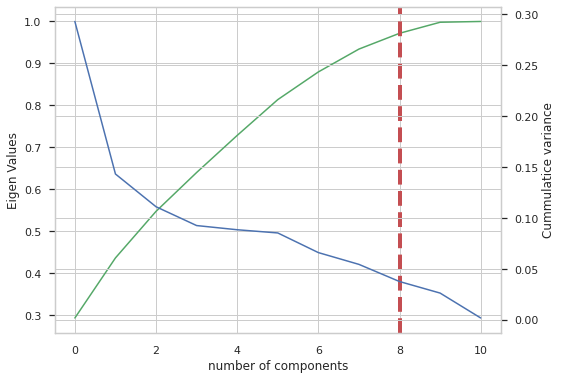

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=11)
pcaDF=pca_test.fit(scaled_x_train)
sns.set(style='whitegrid')
# plt.figure(1, figsize=(8, 6))
fig, plt = plt.subplots(figsize=(8,6))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_),'g-')
plt.set_ylabel('Eigen Values')
plt2 = plt.twinx()
plt2.plot((pca_test.explained_variance_ratio_),'b-')
plt2.set_ylabel('Cummulatice variance')
plt.set_xlabel('number of components')

# plt1.plot(x, y1, 'g-')
# ax2.plot(x, y2, 'b-')

# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')
# ax2.set_ylabel('Y2 data', color='b')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=8, ymin=0, ymax=1)
# plt.savefig('Plots data1/pca_cumm.png')
# display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr


In [322]:
pca_df

Cumulative Variance Ratio  Explained Variance Ratio
0                    0.292932                  0.292932
1                    0.436136                  0.143204
2                    0.547197                  0.111061
3                    0.639790                  0.092593
4                    0.728275                  0.088485
5                    0.813615                  0.085340
6                    0.879669                  0.066054
7                    0.934156                  0.054487
8                    0.971806                  0.037649
9                    0.998123                  0.026317
10                   1.000000                  0.001877

In [135]:
pca_final = PCA(n_components=8)
pca_finalDF=pca_final.fit_transform(scaled_x_train)



from sklearn.metrics import mean_squared_error

# # transformed_data = (...).fit_transform(X)
# inverse_data = np.linalg.pinv((rp).components_.T)
# reconstructed_data = transformed_data.dot(inverse_data)






recon = pca_final.inverse_transform(pca_final.fit_transform(scaled_x_train))
rmse = mean_squared_error(scaled_x_train, recon,squared=False)
print("RMSE: {} with {} components".format(rmse, 8))


pca_test.explained_variance_ratio_

RMSE: 0.2295021794647574 with 8 components


array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942, 0.02631701,
       0.00187719])

In [334]:
y_train_res=y2.copy()
y=y_train_res.values.astype(np.int8)
target_names = np.unique(y)


In [335]:
set(y2)

{3, 4, 5, 6, 7, 8, 9}

In [156]:
# # Import libraries
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt


# # Creating dataset
# z = np.random.randint(100, size =(50))
# x = np.random.randint(80, size =(50))
# y = np.random.randint(60, size =(50))

# # Creating figure
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")

# # Creating plot
# ax.scatter3D(x, y, z, color = "green")
# plt.title("simple 3D scatter plot")

# # show plot
# plt.show()
# plt.title("simple 3D scatter plot")
# ax.set_xlabel('X-axis', fontweight ='bold')
# ax.set_ylabel('Y-axis', fontweight ='bold')
# ax.set_zlabel('Z-axis', fontweight ='bold')

In [148]:
# del(plt)

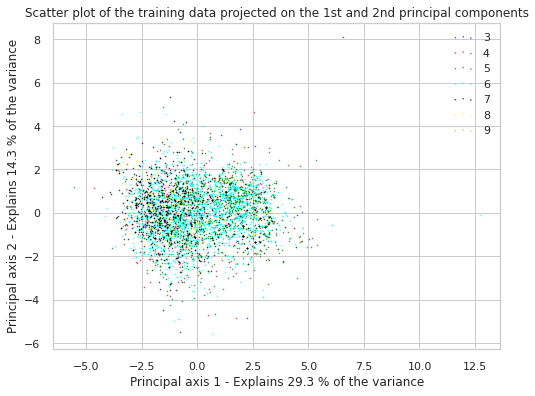

In [338]:
# colors = ['blue', 'red']
plt.figure(1, figsize=(8, 6))
colors = ['blue', 'red','green','cyan','black','yellow','orange']
# fig=plt.figure(1, figsize=(10, 10))
# ax = plt.axes(projection ="3d")
for color, i, target_name in zip(colors, [3, 4, 5, 6, 7, 8, 9], target_names):

# for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(pca_finalDF[y == i, 0], pca_finalDF[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[1] * 100.0))
plt.savefig('../plots/pca_data2_Com12.png')

# plt.savefig('Plots data1/pca_data1_scatter.png')
# plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

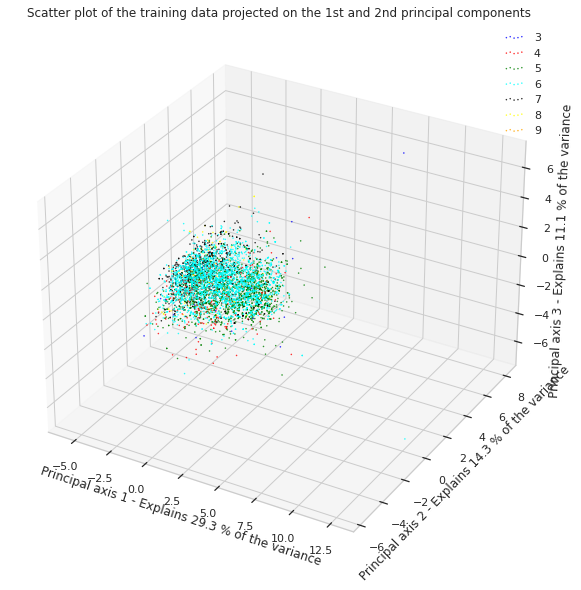

In [257]:
colors = ['blue', 'red','green','cyan','black','yellow','orange']
fig=plt.figure(1, figsize=(10, 10))
ax = plt.axes(projection ="3d")
for color, i, target_name in zip(colors, [3, 4, 5, 6, 7, 8, 9], target_names):
    ax.scatter3D(pca_finalDF[y == i, 0], pca_finalDF[y == i, 1],pca_finalDF[y == i, 2], color=color, s=1,
                alpha=.9, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=5)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
ax.set_xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[0] * 100.0))
ax.set_ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[1] * 100.0))
ax.set_zlabel("Principal axis 3 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[2] * 100.0))

# plt.savefig('pca-porto-01.png', dpi=150)

plt.savefig('../plots/pca_data2_Com12.png')
plt.show()

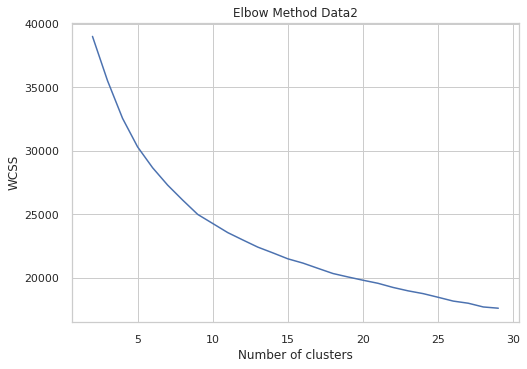

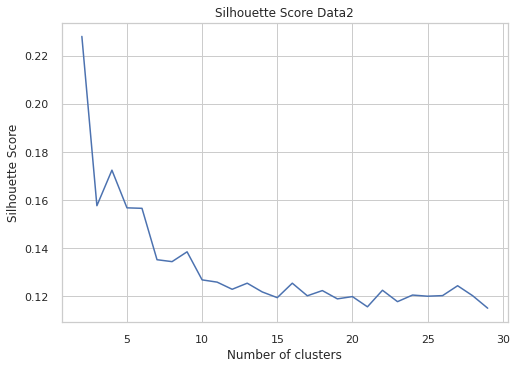

In [259]:
from sklearn.cluster import KMeans
wcss = []
sscore=[]
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_finalDF)
    wcss.append(kmeans.inertia_)
    sscore.append(silhouette_score(pca_finalDF, kmeans.labels_, metric='euclidean'))
#
# Print the score
# #
# # print('Silhouetter Score: %.3f' % score)

# plt.title('Elbow Method Data1')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.savefig('Plots data1/pca_data1_wcss.png')
# plt.show()

# plt.plot(range(2, 30), sscore)
# plt.title('Silhouette Score Data1')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.savefig('Plots data1/pca_data1_Sscore.png')
# plt.show()
plt.plot(range(2, 30), wcss)
plt.title('Elbow Method Data2')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.savefig('../plots/pca_data2_Elbow.png')
plt.show()
plt.plot(range(2, 30), sscore)
plt.title('Silhouette Score Data2')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.savefig('../plots/pca_data2_Sscore.png')
plt.show()

In [284]:
pca_finalDF.shape

(4898, 8)

In [ ]:
kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_finalDF)

In [330]:
kmeanModel= KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel.fit(pca_finalDF)

# scaled_x_train[:,5].shape
kmeanModel.predict(pca_finalDF)
y_train_res.shape

# df=pd.DataFrame(columns=X_train_res.columns)
# df.shape

df=pd.DataFrame(pca_finalDF)
# df.columns=



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel.predict(pca_finalDF)
df['target']=y_train_res
print(df.shape)

    

(4898, 10)


Text(0.5, 1.0, 'K_Means')

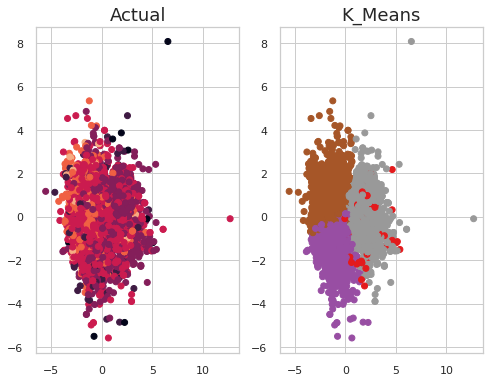

In [332]:
    fig, axes = plt.subplots(1, 2, figsize=(8,6))
    axes[0].scatter(df.iloc[:,0], df.iloc[:,1], c=df['target'])
    axes[1].scatter(df.iloc[:,0], df.iloc[:,1], c=df['k_means'], cmap=plt.cm.Set1)
#     axes[0].set_title('Actual', fontsize=18)
#     axes[1].set_title('K_Means', fontsize=18)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)

Automatically created module for IPython interactive environment


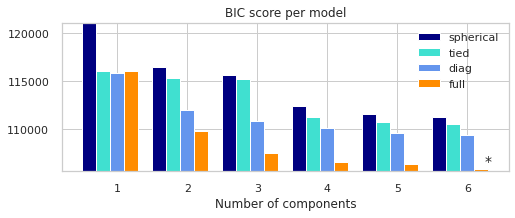

In [323]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 200

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X=pca_finalDF
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
# 

In [324]:
best_gmm

GaussianMixture(n_components=6)

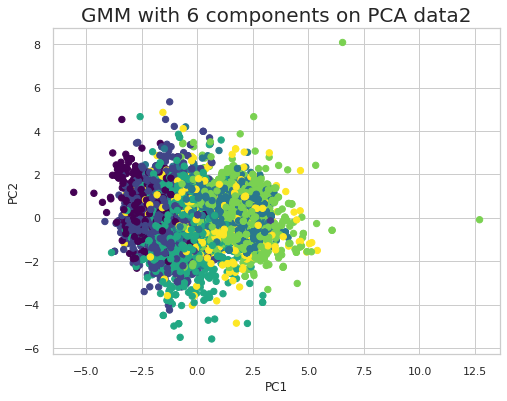

In [328]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components on PCA data2"%len(gmm.means_), fontsize=(20))
    plt.xlabel("PC1")
    plt.ylabel("PC2")
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

plot_gmm(best_gmm, X)


In [160]:
# Creating ICA object
from sklearn.decomposition import FastICA

meanKurt=[]

# tmp = pd.DataFrame(tmp)
for j in range(2,12):
    ICA = FastICA(n_components=j)
    IndependentComponentValues=ICA.fit_transform(scaled_x_train)

    #Creating the dataframe
#     print('####### Final Independent Components ######')
    ReducedData=pd.DataFrame(data=IndependentComponentValues)
    #                          , columns=['IC1','IC2'])
#     print(ReducedData.head(10))

    tmp= ReducedData.kurt(axis=0)
    x=tmp.abs().mean()
    meanKurt.append(x)

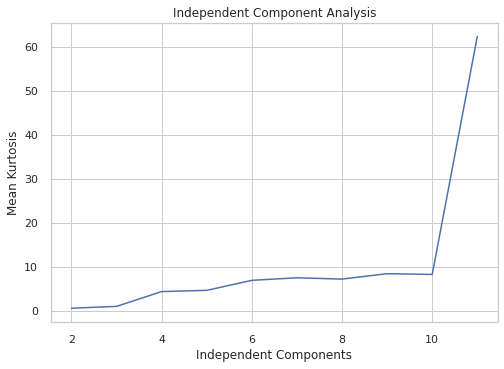

In [261]:
plt.plot(range(2, 12), meanKurt)
plt.title('Independent Component Analysis')
plt.xlabel('Independent Components')
plt.ylabel('Mean Kurtosis')
plt.savefig('../plots/pca_data2_ICA.png')

plt.show()
# plt.plot(range(2, 30), sscore)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('S Score')
# plt.show()

In [166]:
X2.shape

(4898, 11)

In [169]:
ICAFinal = FastICA(n_components=10)
IndependentComponentValues=ICAFinal.fit_transform(scaled_x_train)

ReducedData=pd.DataFrame(data=IndependentComponentValues)

tmp= ReducedData.kurt(axis=0)
x=tmp.abs().mean()
x

7.932775487308755

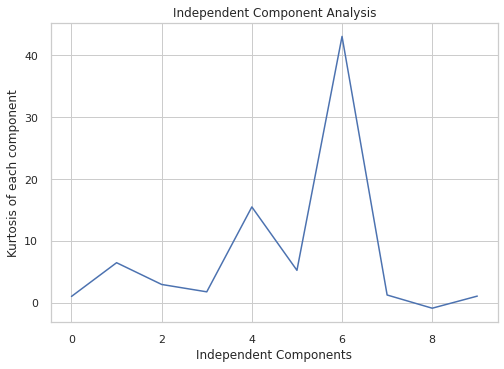

<Figure size 576x396 with 0 Axes>

In [173]:
plt.plot(range(0,10), tmp)
plt.title('Independent Component Analysis')
plt.xlabel('Independent Components')
plt.ylabel('Kurtosis of each component')
plt.show()
plt.savefig('../plots/pca_data2_ICA.png')
# plt.plot(range(2, 30), sscore)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('S Score')
# plt.show()

In [172]:
tmp

0     1.034164
1     6.486205
2     2.968116
3     1.777596
4    15.506517
5     5.254248
6    43.077888
7     1.265382
8    -0.871115
9     1.086524
dtype: float64

Removing 0,3,7,8,9 components as the kurtosis is very less

In [175]:
IndependentComponentValues2=IndependentComponentValues.copy()

In [262]:
IndependentComponentValues2

array([[-0.00419137,  0.0106315 , -0.02043102,  0.00790721, -0.00693733],
       [-0.00448592, -0.02296092, -0.00800846, -0.00917561, -0.00078854],
       [-0.00487592,  0.00444389, -0.00365258, -0.00916298,  0.00297235],
       ...,
       [ 0.01278727, -0.02867726,  0.00790035, -0.00348132, -0.00402295],
       [-0.00087344, -0.00806683, -0.00297415,  0.00050545, -0.00931283],
       [-0.00976397, -0.01846286, -0.00060873,  0.00626742, -0.01186643]])

In [265]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [340]:
IndependentComponentValues2

array([[-0.00419137,  0.0106315 , -0.02043102,  0.00790721, -0.00693733],
       [-0.00448592, -0.02296092, -0.00800846, -0.00917561, -0.00078854],
       [-0.00487592,  0.00444389, -0.00365258, -0.00916298,  0.00297235],
       ...,
       [ 0.01278727, -0.02867726,  0.00790035, -0.00348132, -0.00402295],
       [-0.00087344, -0.00806683, -0.00297415,  0.00050545, -0.00931283],
       [-0.00976397, -0.01846286, -0.00060873,  0.00626742, -0.01186643]])

In [275]:
i
df[labels == i]

0         1         2         3         4  k_means  target
2    -0.004876  0.004444 -0.003653 -0.009163  0.002972        1       6
5    -0.004876  0.004444 -0.003653 -0.009163  0.002972        1       6
11   -0.001631 -0.001694 -0.007276 -0.001188 -0.009174        1       5
25    0.005166  0.020169  0.012428  0.017257 -0.004425        3       6
27   -0.004194  0.007897 -0.008740 -0.000939  0.002040        3       6
...        ...       ...       ...       ...       ...      ...     ...
4766  0.013284  0.013192 -0.004457  0.001857  0.010204        2       8
4811  0.000022 -0.008103 -0.006372  0.008421  0.024680        2       6
4823  0.002771  0.005140 -0.009515  0.006703  0.009289        2       7
4837 -0.003163  0.029342  0.010065  0.023559 -0.005308        1       6
4857  0.001562  0.015655 -0.017441 -0.009107  0.000172        1       6

[428 rows x 7 columns]

In [282]:
# colors = ['blue', 'red','green','cyan','black','yellow','orange','silver','navy', 'turquoise']
# fig=plt.figure(1, figsize=(10, 10))
# # ax = plt.axes(projection ="3d")
# for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], target_names):
#     plt.scatter(IndependentComponentValues[labels == i, 4],IndependentComponentValues[labels == i, 6], color=color, s=1,
#                 alpha=.8, label=target_name, marker='.')
# plt.legend(loc='best', shadow=False, scatterpoints=3)
# plt.title(
#         "Scatter plot of the training data projected on the 1st "
#         "and 2nd principal components")
# plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
#         pca_test.explained_variance_ratio_[0] * 100.0))
# plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
#         pca_test.explained_variance_ratio_[1] * 100.0))
# # plt.savefig('Plots data1/pca_data1_scatter.png')
# # plt.savefig('pca-porto-01.png', dpi=150)
# plt.show()

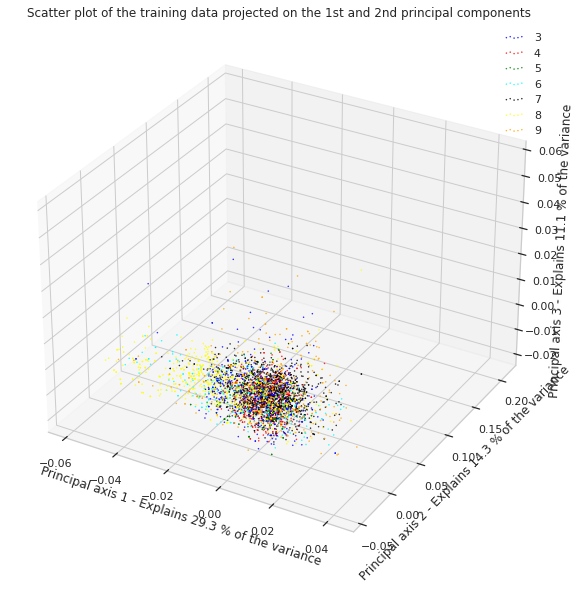

In [339]:
colors = ['blue', 'red','green','cyan','black','yellow','orange','silver','navy', 'turquoise']
fig=plt.figure(1, figsize=(10, 10))
ax = plt.axes(projection ="3d")
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], target_names):
    ax.scatter3D(IndependentComponentValues[labels == i, 1], IndependentComponentValues[labels == i, 4],IndependentComponentValues[labels == i, 6], color=color, s=1,
                alpha=.9, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=5)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
ax.set_xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[0] * 100.0))
ax.set_ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[1] * 100.0))
ax.set_zlabel("Principal axis 3 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[2] * 100.0))

# plt.savefig('pca-porto-01.png', dpi=150)
plt.show()
# plt.savefig('../plots/pca_data2_Com12.png')

In [183]:
IndependentComponentValues2=IndependentComponentValues2[:,[1,2,4,5,6]]

In [342]:


kmeanModel23= KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel23.fit(IndependentComponentValues2)

# scaled_x_train[:,5].shape
kmeanModel23.predict(IndependentComponentValues2)
y_train_res.shape

# df=pd.DataFrame(columns=X_train_res.columns)
# df.shape

df=pd.DataFrame(IndependentComponentValues2)
# df.columns=



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel23.predict(IndependentComponentValues2)
df['target']=y_train_res
print(df.shape)

# X = pca_finalDF.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(df)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = df['k_means']
dftsne.columns = ['x1','x2','cluster']

ICAFinal = FastICA(n_components=2)
IndependentComponentValues3=ICAFinal.fit_transform(scaled_x_train)
dfskillsICA2 = pd.DataFrame(IndependentComponentValues3)
dfskillsICA2['cluster'] = df['k_means']
dfskillsICA2.columns = ['x1','x2','cluster']



(4898, 7)


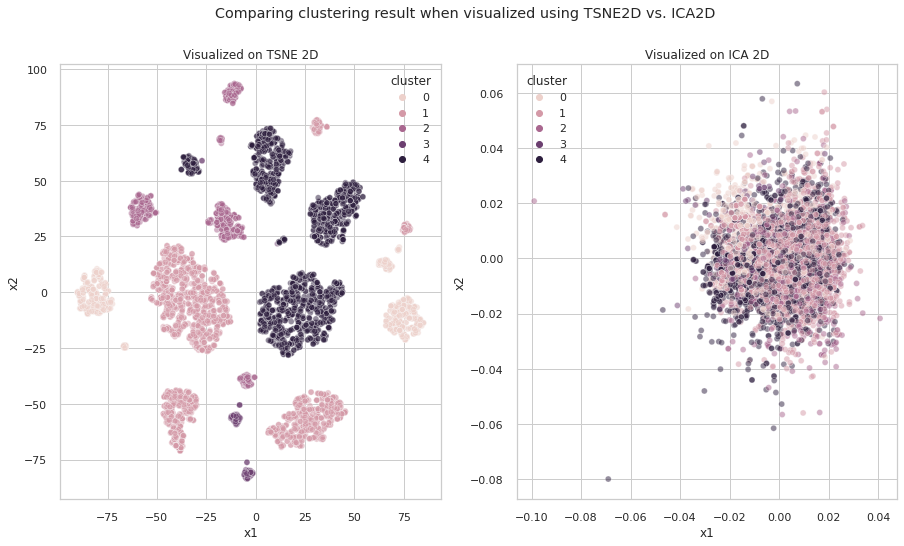

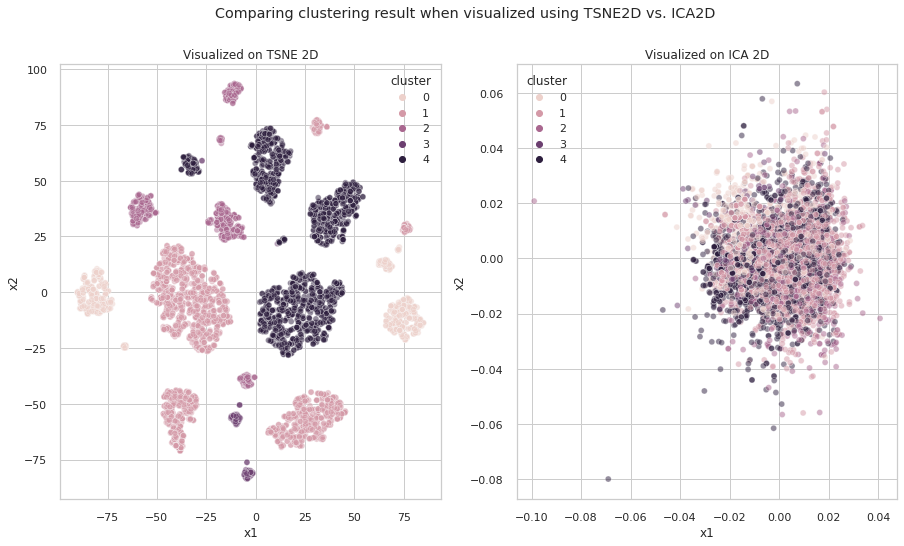

In [188]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsICA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on ICA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. ICA2D')
fig.savefig('../plots/data2_ICA_tsne.png')
display(fig)

In [286]:
IndependentComponentValues2.shape

(4898, 5)

In [346]:
target_names=df['k_means'].unique()
target_names

array([1, 4, 0, 2, 3], dtype=int32)

In [347]:
tmp

0     1.034164
1     6.486205
2     2.968116
3     1.777596
4    15.506517
5     5.254248
6    43.077888
7     1.265382
8    -0.871115
9     1.086524
dtype: float64

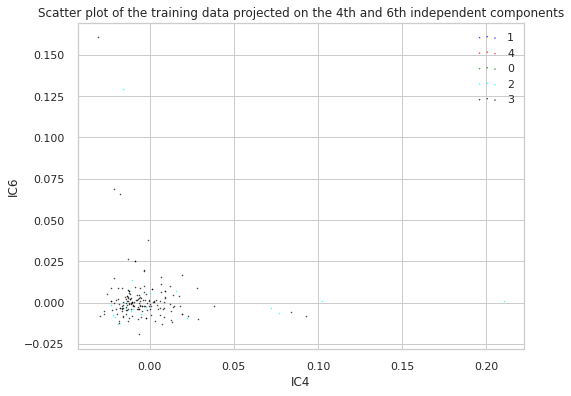

In [349]:
colors = ['blue', 'red','green','cyan','black']
#           ,'orange','maroon','pink']
plt.figure(1, figsize=(8, 6))

for color, i, target_name in zip(colors, [0, 1,2,3,4], target_names):
    plt.scatter(IndependentComponentValues[y == i, 4], IndependentComponentValues[y == i, 6], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 4th "
        "and 6th independent components")
plt.xlabel("IC4")
plt.ylabel("IC6")
# plt.savefig('Plots data1/Ica_data1_scatter_km.png')
# plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

Automatically created module for IPython interactive environment


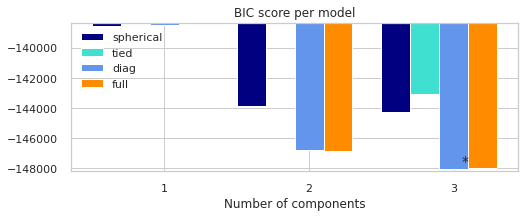

In [350]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 200

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X=IndependentComponentValues2
lowest_bic = np.infty
bic = []
n_components_range = range(1, 4)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
# 

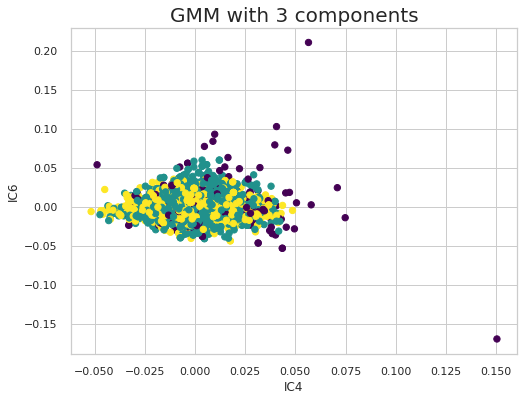

In [354]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("IC4")
    plt.ylabel("IC6")
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

IndependentComponentValues2.shape

plot_gmm(gmm, X)


In [191]:
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection


rp = GaussianRandomProjection(n_components=11)
transformed_data=rp.fit_transform(X2)

# transformed_data = (...).fit_transform(X)
inverse_data = np.linalg.pinv((rp).components_.T)
reconstructed_data = transformed_data.dot(inverse_data)

from sklearn.metrics import mean_squared_error




# recon = rp.inverse_transform(rp.fit_transform(scaled_x_train))
rmse = mean_squared_error(scaled_x_train, reconstructed_data,squared=False)
print("RMSE: {} with {} components".format(rmse, 2))


RMSE: 1.822189454302218e-15 with 2 components


In [290]:
def run_RCA(X,y,title):
    
    dims = list(np.arange(2,(X.shape[1]-1),3))
    dims.append(X.shape[1])
    tmp = defaultdict(dict)

    for i,dim in product(range(5),dims):
        rp = RCA(random_state=i, n_components=dim)
        tmp[dim][i] = pairwiseDistCorr(rp.fit_transform(X), X)
    tmp = pd.DataFrame(tmp).T
    mean_recon = tmp.mean(axis=1).tolist()
    std_recon = tmp.std(axis=1).tolist()


    fig, ax1 = plt.subplots()
    ax1.plot(dims,mean_recon, 'b-')
    ax1.set_xlabel('Random Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

#     ax2 = ax1.twinx()
#     ax2.plot(dims,std_recon, 'm-')
#     ax2.set_ylabel('STD Reconstruction Correlation', color='m')
#     ax2.tick_params('y', colors='m')
#     plt.grid(False)

    plt.title("Random Components for 5 Restarts: "+ title)
    fig.tight_layout()
    plt.show()

from collections import defaultdict
from itertools import product
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA


def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

from sklearn.metrics.pairwise import pairwise_distances


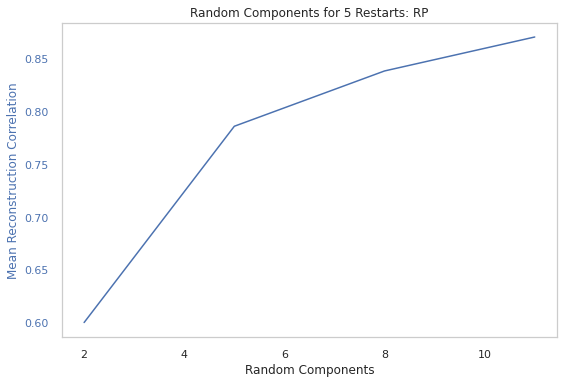

In [291]:
RCAresults=run_RCA(X=scaled_x_train,y=y_train_res,title="RP")

In [292]:
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection


rp = GaussianRandomProjection(n_components=5)
transformed_data=rp.fit_transform(scaled_x_train)

transformed_data.shape

#     recon = rp.inverse_transform(rp.fit_transform(scaled_x_train))
inverse_data = np.linalg.pinv((rp).components_.T)
reconstructed_data = transformed_data.dot(inverse_data)
rmse = mean_squared_error(scaled_x_train, reconstructed_data,squared=False)
print("RMSE: {} with {} components".format(rmse, 5))


RMSE: 0.6638959411551978 with 5 components


In [368]:
rmselist= []
# sscore=[]
dims = list(np.arange(2,(scaled_x_train.shape[1]-1),3))
dims.append(scaled_x_train.shape[1])
tmp = defaultdict(dict)

for i,dim in product(range(1,5),dims):
    rp = GaussianRandomProjection(random_state=i, n_components=dim)
    X_reduced = rp.fit_transform(scaled_x_train)
    inverse_data = np.linalg.pinv((rp).components_.T)
    reconstructed_data = X_reduced.dot(inverse_data)
    rmse = mean_squared_error(scaled_x_train, reconstructed_data,squared=False)
    rmselist.append(rmse)


In [370]:
len(rmselist)

16

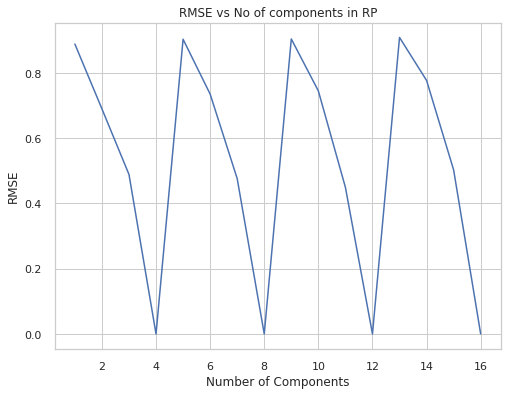

FileNotFoundError: [Errno 2] No such file or directory: 'Plots data1/rmse_data2RP.png'

<Figure size 576x432 with 0 Axes>

In [372]:


plt.plot(range(1, 17), rmselist)
plt.title('RMSE vs No of components in RP')
plt.xlabel('Number of Components')
plt.ylabel('RMSE')

# plt.savefig('Plots data1/rmseRP.png')
plt.show()
# plt.plot(range(2, 30), sscore)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('S Score')
plt.savefig('Plots data1/rmse_data2RP.png')
# plt.show()

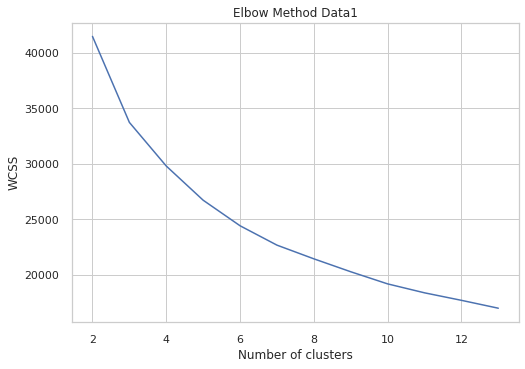

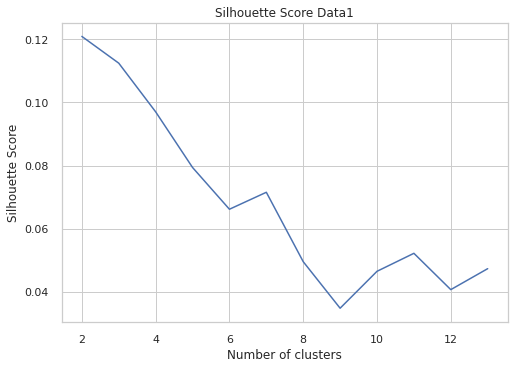

In [296]:
from sklearn.cluster import KMeans
wcss = []
sscore=[]
for i in range(2, 14):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(transformed_data)
    wcss.append(kmeans.inertia_)
    sscore.append(silhouette_score(pca_finalDF, kmeans.labels_, metric='euclidean'))
#
# Print the score
#
# print('Silhouetter Score: %.3f' % score)


plt.plot(range(2, 14), wcss)
plt.title('Elbow Method Data1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('../plots/rp_data2_wcss.png')
plt.show()

plt.plot(range(2, 14), sscore)
plt.title('Silhouette Score Data1')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('../plots/rp_data2_Sscore.png')
plt.show()



In [ ]:
# RCAresults=run_RCA(X=scaled_x_train,y=y_train_res,title="RP")

In [355]:
kmeanModel23= KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel23.fit(transformed_data)

# scaled_x_train[:,5].shape
kmeanModel23.predict(transformed_data)
y_train_res.shape

# df=pd.DataFrame(columns=X_train_res.columns)
# df.shape

df=pd.DataFrame(transformed_data)
# df.columns=



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel23.predict(transformed_data)
df['target']=y_train_res
print(df.shape)

# X = pca_finalDF.iloc[:,:-1]
# Xtsne = TSNE(n_components=2).fit_transform(df)
# dftsne = pd.DataFrame(Xtsne)
# dftsne['cluster'] = df['k_means']
# dftsne.columns = ['x1','x2','cluster']

# ICAFinal = FastICA(n_components=2)
# IndependentComponentValues22=ICAFinal.fit_transform(scaled_x_train)
# dfskillsICA2 = pd.DataFrame(IndependentComponentValues22)
# dfskillsICA2['cluster'] = df['k_means']
# dfskillsICA2.columns = ['x1','x2','cluster']



(4898, 7)


Text(0.5, 1.0, 'K_Means')

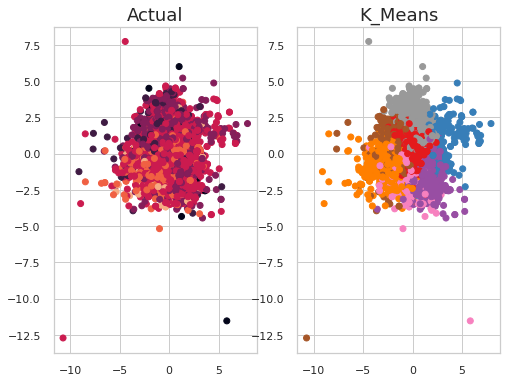

In [356]:
# 
    fig, axes = plt.subplots(1, 2, figsize=(8,6))
    axes[0].scatter(df.iloc[:,0], df.iloc[:,1], c=df['target'])
    axes[1].scatter(df.iloc[:,0], df.iloc[:,1], c=df['k_means'], cmap=plt.cm.Set1)
#     axes[0].set_title('Actual', fontsize=18)
#     axes[1].set_title('K_Means', fontsize=18)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)

Automatically created module for IPython interactive environment


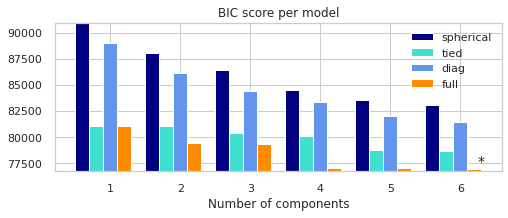

In [358]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 200

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X=transformed_data
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
# 



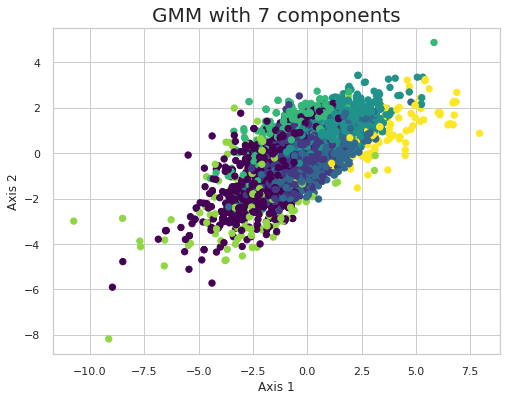

In [359]:


gmm = mixture.GaussianMixture(n_components=7)
#                                       covariance_type='diag')
gmmData=gmm.fit(X)



gmmDataDf=gmmData.predict_proba(X)

gmmDataDf=pd.DataFrame(gmmDataDf)

best_gmm

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 3], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("Axis 1")
    plt.ylabel("Axis 2")
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

IndependentComponentValues2.shape

plot_gmm(gmm, X)


In [192]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=4, kernel='linear')
X_transformed = transformer.fit_transform(scaled_x_train)

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(scaled_x_train)
X_preimage = rbf_pca.inverse_transform(X_reduced)

rmse = mean_squared_error(scaled_x_train, X_preimage,squared=False)
print("RMSE: {} with {} components".format(rmse, 2))


RMSE: 8.471548623246887e-14 with 2 components


In [373]:
rmselist= []
# sscore=[]
for i in range(1, 11):
    rbf_pca = KernelPCA(n_components = i, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
    X_reduced = rbf_pca.fit_transform(scaled_x_train)
    X_preimage = rbf_pca.inverse_transform(X_reduced)

    rmse = mean_squared_error(scaled_x_train, X_preimage,squared=False)

    rmselist.append(rmse)
#     sscore.append(silhouette_score(scaled_x_train, kmeans.labels_, metric='euclidean'))
#
# Print the score
#
# print('Silhouetter Score: %.3f' % score)


plt.plot(range(1, 11), rmselist)
plt.title('RMSE vs No of components in KernelPCA')
plt.xlabel('Number of Components')
plt.ylabel('RMSE')

# plt.savefig('Plots data1/rmseKernel.png')
plt.savefig('../plots/data2_rmseKernel.png')
plt.show()
# plt.plot(range(2, 30), sscore)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('S Score')
# plt.savefig('Plots data1/kmeans1_SScore.png')
# plt.show()

KeyboardInterrupt: 

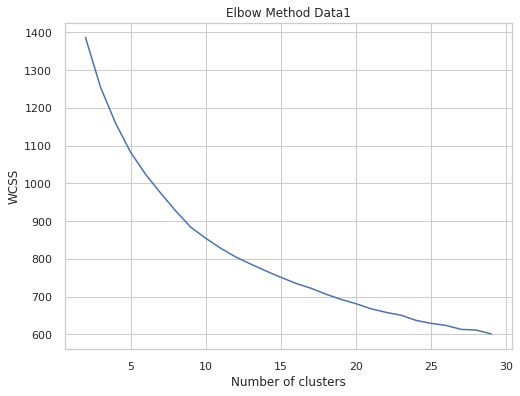

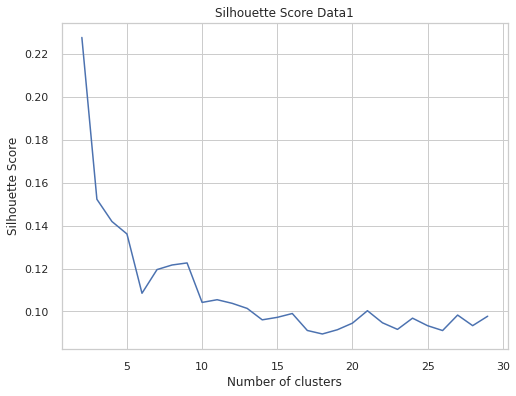

In [360]:
from sklearn.cluster import KMeans
wcss = []
sscore=[]
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
    sscore.append(silhouette_score(pca_finalDF, kmeans.labels_, metric='euclidean'))
#
# Print the score
#
# print('Silhouetter Score: %.3f' % score)


plt.plot(range(2, 30), wcss)
plt.title('Elbow Method Data1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('Plots data1/rp_data1_wcss.png')
plt.show()

plt.plot(range(2, 30), sscore)
plt.title('Silhouette Score Data1')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# plt.savefig('Plots data1/rp_data1_Sscore.png')
plt.show()



In [361]:
X_transformed=X_reduced

In [362]:
kmeanModel23= KMeans(n_clusters=9, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel23.fit(X_transformed)

# scaled_x_train[:,5].shape
kmeanModel23.predict(X_transformed)
y_train_res.shape

# df=pd.DataFrame(columns=X_train_res.columns)
# df.shape

df=pd.DataFrame(X_transformed)
# df.columns=



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel23.predict(X_transformed)
df['target']=y_train_res
print(df.shape)

# X = pca_finalDF.iloc[:,:-1]
# Xtsne = TSNE(n_components=2).fit_transform(df)
# dftsne = pd.DataFrame(Xtsne)
# dftsne['cluster'] = df['k_means']
# dftsne.columns = ['x1','x2','cluster']

# ICAFinal = FastICA(n_components=2)
# IndependentComponentValues22=ICAFinal.fit_transform(scaled_x_train)
# dfskillsICA2 = pd.DataFrame(IndependentComponentValues22)
# dfskillsICA2['cluster'] = df['k_means']
# dfskillsICA2.columns = ['x1','x2','cluster']


(4898, 12)


Text(0.5, 1.0, 'K_Means')

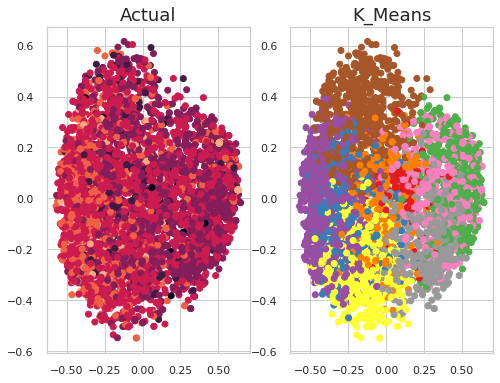

In [363]:



# 
    fig, axes = plt.subplots(1, 2, figsize=(8,6))
    axes[0].scatter(df.iloc[:,0], df.iloc[:,1], c=df['target'])
    axes[1].scatter(df.iloc[:,0], df.iloc[:,1], c=df['k_means'], cmap=plt.cm.Set1)
#     axes[0].set_title('Actual', fontsize=18)
#     axes[1].set_title('K_Means', fontsize=18)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)


Automatically created module for IPython interactive environment


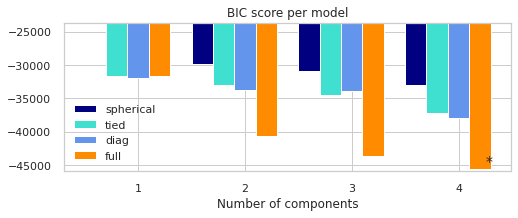

In [365]:

import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 200

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X=X_transformed
lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
# 








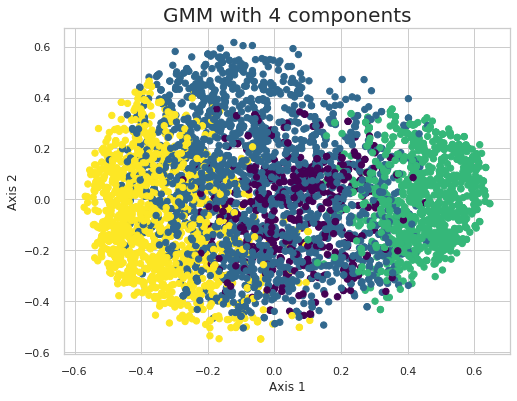

In [366]:

gmm = mixture.GaussianMixture(n_components=4)
#                                       covariance_type='diag')
gmmData=gmm.fit(X)



gmmDataDf=gmmData.predict_proba(X)

gmmDataDf=pd.DataFrame(gmmDataDf)

best_gmm

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("Axis 1")
    plt.ylabel("Axis 2")
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

# IndependentComponentValues2.shape

plot_gmm(gmm, X)
